In [1]:
#Importar librerias para el analisis de datos

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm

import random
import pickle as pkl

In [2]:
#Imprimir versiones de las librerias

print (f"pandas == {np.__version__}")
print(f"numpy=={np.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"scipy=={scipy.__version__}")
print(f"seaborn=={sns.__version__}")

pandas == 2.2.0
numpy==2.2.0
matplotlib==3.10.0
scipy==1.14.1
seaborn==0.13.2


In [3]:
#Carga datos del archivo idealista_madrid.csv
#Comprobar que los datos se han cargado correctamente

price = np.genfromtxt("idealista_madrid.csv", usecols=(0), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
bedrooms = np.genfromtxt("idealista_madrid.csv", usecols=(1), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
bathrooms = np.genfromtxt("idealista_madrid.csv", usecols=(2), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64) 
size = np.genfromtxt("idealista_madrid.csv", usecols=(3), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
adress= np.genfromtxt('idealista_madrid.csv',delimiter=',',dtype=str,usecols=4,encoding='utf-8',skip_header=1)
                     
print(f"Price: {price [:5]}")
print(f"Bedrooms: {bedrooms[:5]}")
print(f"Bathrooms: {bathrooms [:5]}")
print(f"Size:{size [:5]}")
print(f"Adress:{adress[:5]}")


Price: [1920000 1995000 1300000 1650000 1590750]
Bedrooms: [3 3 3 3 3]
Bathrooms: [3 3 4 3 3]
Size:[183 170 270 248 116]
Adress:['Recoletos' 'Castellana' 'Hortaleza' 'Chamartín' 'Recoletos']


### MEDIA, MEDIANA | MÁXIMO, MÍNIMO | HISTOGRAMA DE DISTRIBUCIÓN DE DATOS 

In [4]:
#media y mediana de los precios
mean_price = np.mean(price)
print(f"Mean price: {mean_price:.2f}")
median_price = np.median(price)
print(f"Median price: {median_price:.2f}")
max= np.max(price)
print(f"Max price: {max:.2f}")
min= np.min(price)
print(f"Min price: {min:.2f}")
print (type (price))


Mean price: 1290575.26
Median price: 990000.00
Max price: 8900000.00
Min price: 122000.00
<class 'numpy.ndarray'>


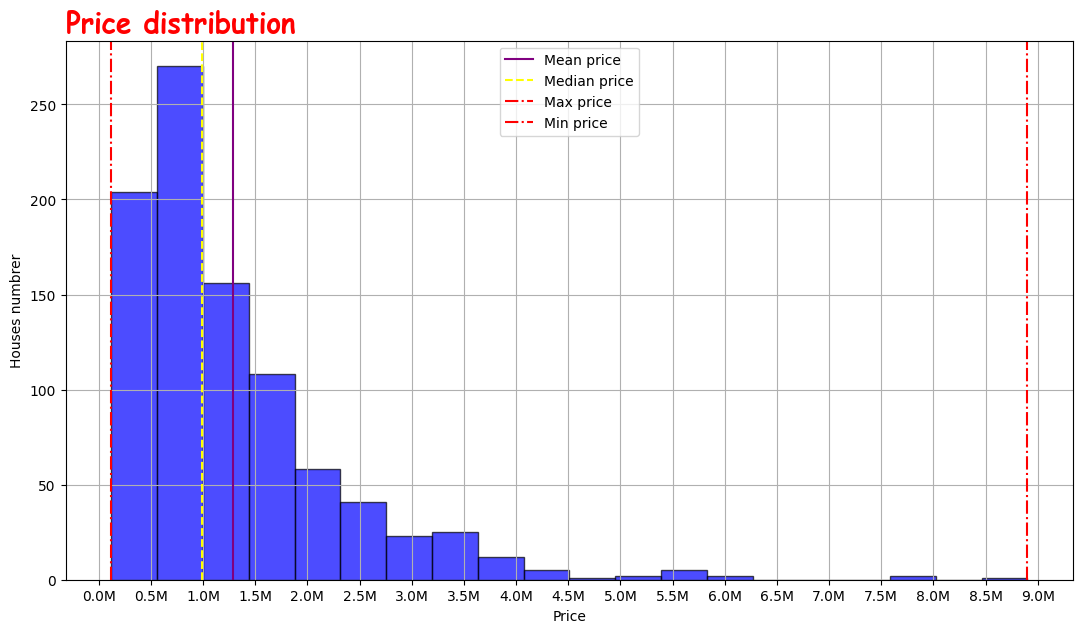

In [5]:
#representacion grafica PRECIOS con un histograma y lineas verticales para la media y la mediana

plt.figure(figsize=(13,7))
plt.hist(price, bins=20, color="blue", alpha=0.7,edgecolor='black')
plt.axvline(mean_price, color="purple", linestyle="-", label="Mean price", linewidth=1.5)
plt.axvline(median_price, color="yellow", linestyle="--", label="Median price", linewidth=1.5)
plt.axvline(max, color="red", linestyle="-.", label="Max price", linewidth=1.5)
plt.axvline(min, color="red", linestyle="-.", label="Min price", linewidth=1.5)
#plt.legend(bbox_to_anchor=[1, 0, 0.2, 1], prop={'family':'times New Roman','size': 16}) #la leyenda de las barras fuera del gráfico.
plt.legend(fontsize=10, loc="upper center")
#plt.xticks(price[::350])
tick_positions = np.arange(0, price.max() + 500_000, 500_000)  # De 500,000 en 500,000
tick_labels = [f"{x / 1_000_000:.1f}M" for x in tick_positions]  # Convertir a miles con "K"
plt.xticks(tick_positions, tick_labels)                                                       
plt.grid()
plt.title("Price distribution", fontsize=20 , fontweight="bold",color="red", fontname="Comic Sans MS", loc="left")
plt.xlabel("Price")
plt.ylabel("Houses numbrer");

In [6]:
#media y mediana de los habitaciones
mean_bedrooms = np.mean(bedrooms)
print(f"Mean bedrooms: {mean_bedrooms:.2f}")
median_bedrooms = np.median(bedrooms)
print(f"Median bedrooms: {median_bedrooms}")
max_bedrooms= np.max(bedrooms)
print(f"Max bedrooms: {max_bedrooms}")
min_bedrooms= np.min(bedrooms)
print(f"Min bedrooms: {min_bedrooms}")


Mean bedrooms: 2.90
Median bedrooms: 3.0
Max bedrooms: 12
Min bedrooms: 1


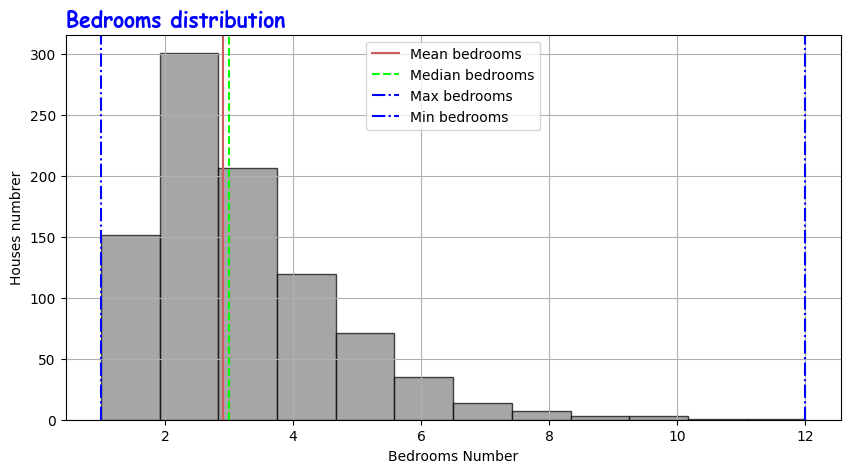

In [7]:
#representacion grafica HABITACIONES con un histograma y lineas verticales para la media y la mediana
plt.figure(figsize=(10,5))
plt.hist(bedrooms, bins=12, color='grey', alpha=0.7, edgecolor='black')
plt.axvline(mean_bedrooms, color='indianred', linestyle="-", label="Mean bedrooms", linewidth=1.5)
plt.axvline(median_bedrooms, color='lime', linestyle="--", label="Median bedrooms", linewidth=1.5)
plt.axvline(max_bedrooms, color='blue', linestyle="-.", label="Max bedrooms", linewidth=1.5)
plt.axvline(min_bedrooms, color='blue', linestyle="-.", label="Min bedrooms", linewidth=1.5)
#plt.legend(bbox_to_anchor=[1, 0, 0.2, 1], prop={'family':'times New Roman','size': 16}) #la leyenda de las barras fuera del gráfico.
plt.legend(fontsize=10, loc="upper center") 
#plt.xticks(price[::350])
#plt.xticks(tick_positions, tick_labels)                                                       
plt.grid()
plt.title("Bedrooms distribution", fontsize=15 , fontweight="bold",color="blue", fontname="Comic Sans MS", loc="left")
plt.xlabel("Bedrooms Number")
plt.ylabel("Houses numbrer");

In [8]:
#media y mediana de los baños
mean_bathrooms = np.mean(bathrooms)
print(f"Mean bathrooms: {mean_bathrooms:.2f}")
median_bathrooms = np.median(bathrooms)
print(f"Median bathrooms: {median_bathrooms}")
max_bathrooms= np.max(bathrooms)
print(f"Max bathrooms: {max_bathrooms}")
min_bathrooms= np.min(bathrooms)
print(f"Min bathrooms: {min_bathrooms}")

Mean bathrooms: 3.47
Median bathrooms: 3.0
Max bathrooms: 12
Min bathrooms: 0


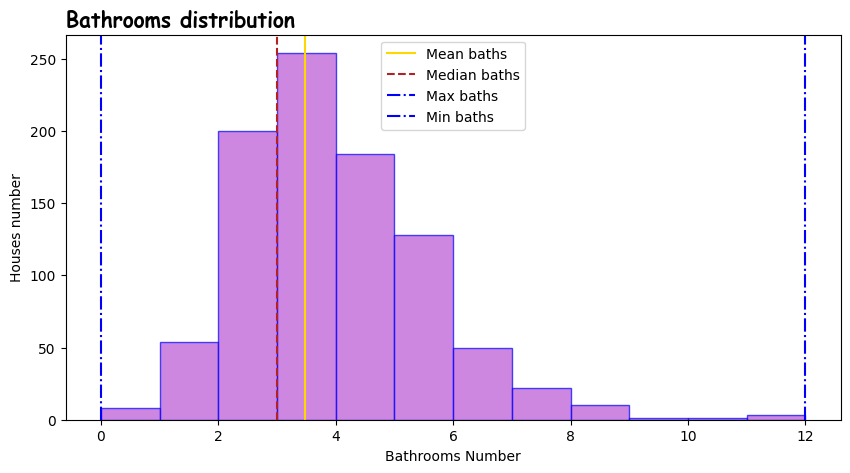

In [9]:
#representacion grafica BAÑOS con un histograma y lineas verticales para la media y la mediana
plt.figure(figsize=(10,5))
plt.hist(bathrooms, bins=12, color='mediumorchid', alpha=0.7,edgecolor='blue')
plt.axvline(mean_bathrooms, color='gold', linestyle="-", label="Mean baths", linewidth=1.5)
plt.axvline(median_bathrooms, color='firebrick', linestyle="--", label="Median baths", linewidth=1.5)
plt.axvline(max_bathrooms, color='blue', linestyle="-.", label="Max baths", linewidth=1.5)
plt.axvline(min_bathrooms, color='blue', linestyle="-.", label="Min baths", linewidth=1.5)
plt.legend(fontsize=10, loc="upper center")                                                     
plt.title("Bathrooms distribution", fontsize=15 , fontweight="bold",color='black', fontname="Comic Sans MS", loc="left")
plt.xlabel("Bathrooms Number")
plt.ylabel("Houses number");

In [10]:
#media y mediana de los metros cuadrados
mean_size= np.mean(size)
print(f"Mean size: {mean_size:.2f}")
median_size = np.median(size)
print(f"Median size: {median_size}")
max_size= np.max(size)
print(f"Max size: {max_size}")
min_size= np.min(size)
print(f"Min size: {min_size}")

Mean size: 217.24
Median size: 158.0
Max size: 1768
Min size: 14


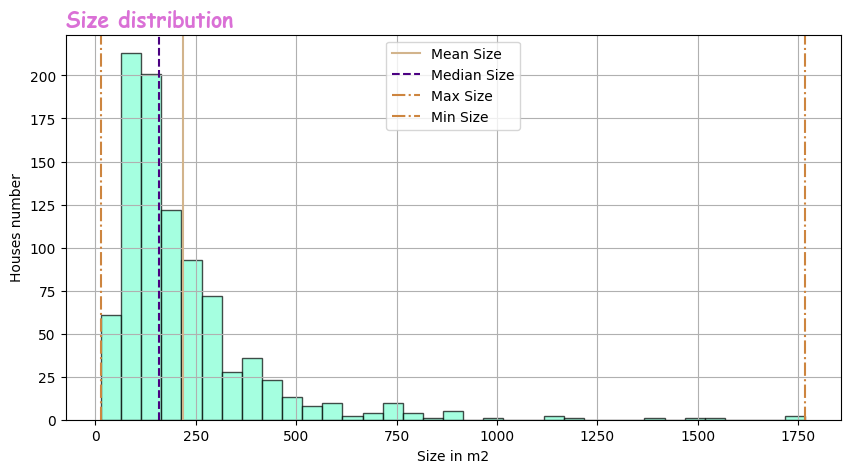

In [11]:
#representacion grafica del TAMAÑO CASAS con histograma y lineas verticales para la media y la mediana
plt.figure(figsize=(10,5))
plt.hist(size, bins=35, color='aquamarine', alpha=0.7, edgecolor='black')
plt.axvline(mean_size, color='tan', linestyle="-", label="Mean Size", linewidth=1.5)
plt.axvline(median_size, color='indigo', linestyle="--", label="Median Size", linewidth=1.5)
plt.axvline(max_size, color='peru', linestyle="-.", label="Max Size", linewidth=1.5)
plt.axvline(min_size, color='peru', linestyle="-.", label="Min Size", linewidth=1.5)
#plt.legend(bbox_to_anchor=[1, 0, 0.2, 1], prop={'family':'times New Roman','size': 16}) #la leyenda de las barras fuera del gráfico.
plt.legend(fontsize=10, loc="upper center")
#plt.xticks(price[::350])
#plt.xticks(tick_positions, tick_labels)                                                       
plt.grid()
plt.title("Size distribution", fontsize=15 , fontweight="bold",color='orchid', fontname="Comic Sans MS", loc="left")
plt.xlabel("Size in m2")
plt.ylabel("Houses number");

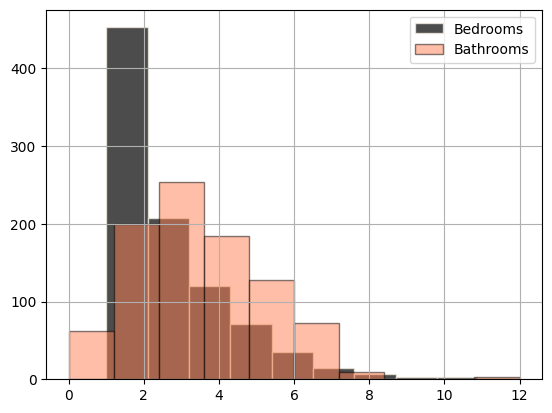

In [12]:
#Representacion de la distribución de las habitaciones y baños en un mismo histograma
plt.hist(bedrooms, bins=10, color='black', alpha=0.7, edgecolor='oldlace', label="Bedrooms")
plt.hist(bathrooms, bins=10, color='coral', alpha=0.5, edgecolor='black', label="Bathrooms")
plt.legend(fontsize=10, loc="upper right")
plt.grid()

### CURVAS DE DENSIDAD 

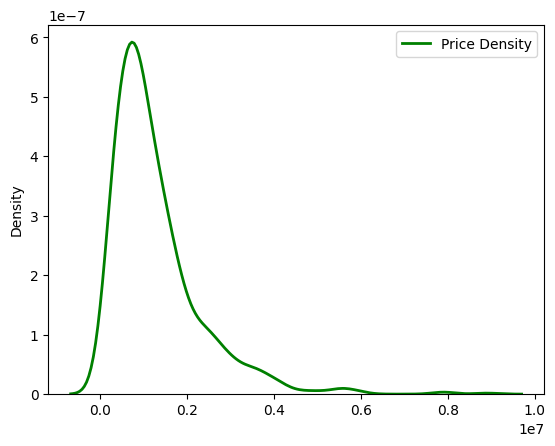

In [13]:
sns.kdeplot(price, color='green', linewidth=2, linestyle='-', label='Price Density')  
plt.legend(fontsize=10, loc="upper right");

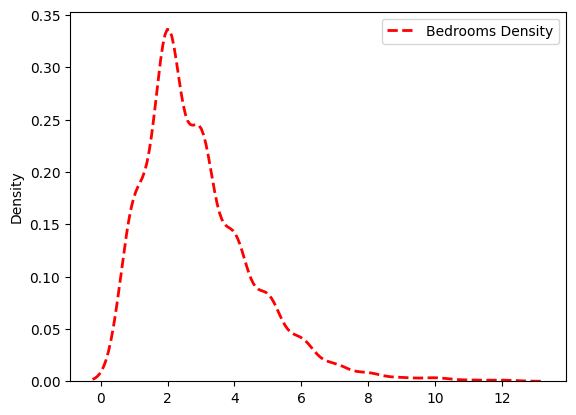

In [14]:
sns.kdeplot(bedrooms, color='red', linewidth=2, linestyle='--', label='Bedrooms Density')
plt.legend(fontsize=10, loc="upper right");

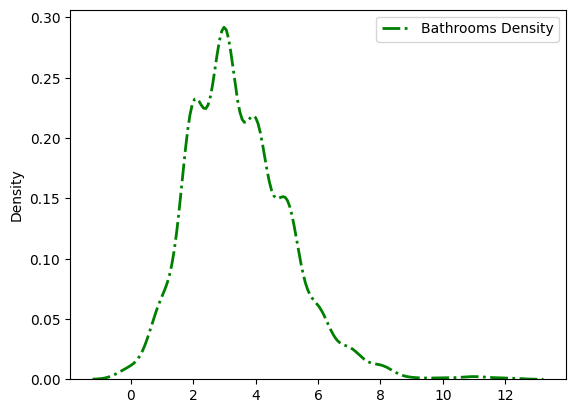

In [15]:
sns.kdeplot(bathrooms, color='green', linewidth=2, linestyle='-.', label='Bathrooms Density')
plt.legend(fontsize=10, loc="upper right");

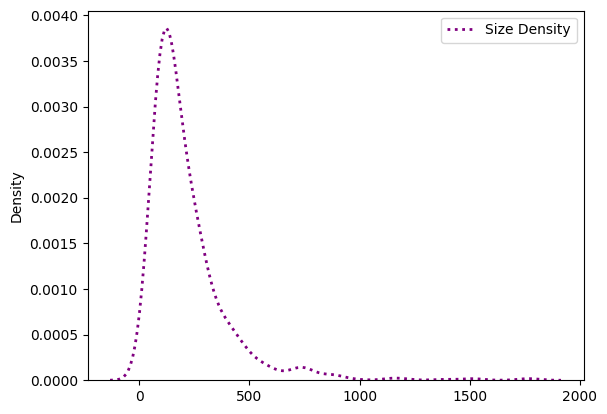

In [16]:
sns.kdeplot(size, color='purple', linewidth=2, linestyle=':', label='Size Density')
plt.legend(fontsize=10, loc="upper right"); 

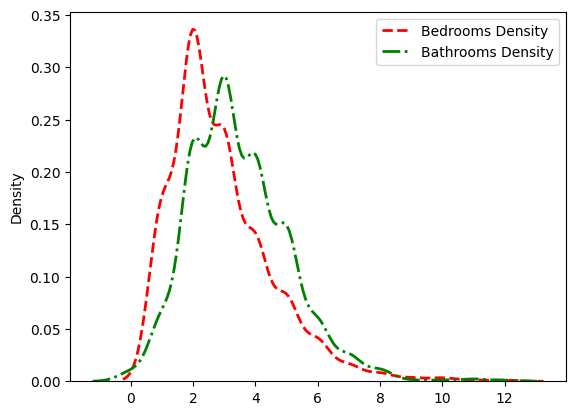

In [17]:
#Representacion grafica de las habitaciones y baños en un mismo histograma mediante curvas de densidad
sns.kdeplot(bedrooms, color='red', linewidth=2, linestyle='--', label='Bedrooms Density')
sns.kdeplot(bathrooms, color='green', linewidth=2, linestyle='-.', label='Bathrooms Density')
plt.legend(fontsize=10, loc="upper right");

### CUARTILES Q1,Q2,Q3 Y RANGO INTERCUARTILICO (IQR)

#### Precio

In [18]:
q1= np.quantile(price, 0.25)
q2= np.quantile(price, 0.5)
q3= np.quantile(price, 0.75)    
print(f"Q1: {q1:.2f}")
print(f"Q2: {q2:.2f}")
print(f"Q3: {q3:.2f}")

IQR= q3-q1
print (f"IQR: {IQR:.2f}")

Q1: 625000.00
Q2: 990000.00
Q3: 1650000.00
IQR: 1025000.00


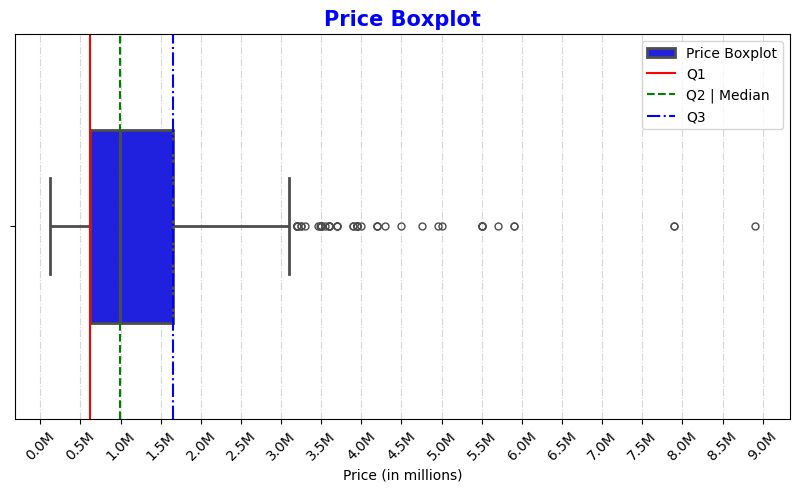

In [19]:
#Boxplot del precio con cuartiles y mediana (Q1, Q2, Q3)
plt.figure(figsize=(10,5))
sns.boxplot(price, color='blue', linewidth=2, label='Price Boxplot', orient='h', width=0.5, fliersize=5, )
tick_positions = np.arange(0, price.max() + 500_000, 500_000)  # Intervalos de 500,000
tick_labels = [f"{x / 1_000_000:.1f}M" for x in tick_positions]  # Convertir a millones con "M"
plt.axvline(q1, color='red', linestyle='-', label='Q1', linewidth=1.5)
plt.axvline(q2, color='green', linestyle='--', label='Q2 | Median', linewidth=1.5)
plt.axvline(q3, color='blue', linestyle='-.', label='Q3', linewidth=1.5)
plt.legend(fontsize=10, loc="upper right")
plt.xticks(tick_positions, tick_labels, rotation=45)
plt.yticks(fontsize=10)
plt.legend(fontsize=10, loc="upper right")    
plt.xticks(tick_positions, tick_labels, rotation=45)
plt.title("Price Boxplot", fontsize=15, fontweight="bold", color="blue")
plt.xlabel("Price (in millions)")
plt.grid(axis='x', linestyle='-.', alpha=0.5)
plt.show(); 

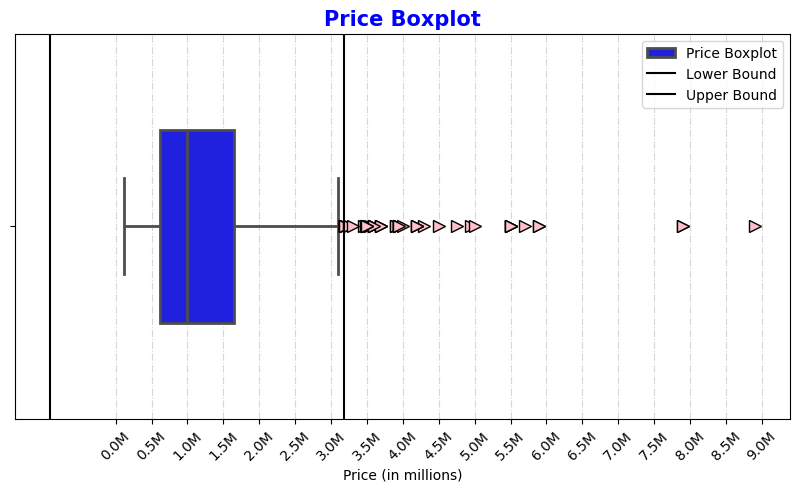

In [20]:
#Definir el rango intercuartílico. Identificacion de outliers.
plt.figure(figsize=(10,5))
sns.boxplot(price, color='blue', linewidth=2, label='Price Boxplot', orient='h', width=0.5, fliersize=5, flierprops=dict(marker='>', markersize=8, markerfacecolor='pink', markeredgecolor='black')) 
tick_positions = np.arange(0, price.max() + 500_000, 500_000)  # Intervalos de 500,000
tick_labels = [f"{x / 1_000_000:.1f}M" for x in tick_positions]  # Convertir a millones con "M"
plt.axvline(q1 - 1.5 * IQR, color='black', linestyle='-', label='Lower Bound', linewidth=1.5)
plt.axvline(q3 + 1.5 * IQR, color='black', linestyle='-', label='Upper Bound', linewidth=1.5)
plt.legend(fontsize=10, loc="upper right")
plt.xticks(tick_positions, tick_labels, rotation=45)
plt.legend(fontsize=10, loc="upper right")    
plt.xticks(tick_positions, tick_labels, rotation=45)
plt.title("Price Boxplot", fontsize=15, fontweight="bold", color="blue")
plt.xlabel("Price (in millions)")
plt.grid(axis='x', linestyle='-.', alpha=0.5)
plt.show(); 

#### Habitaciones

In [21]:
q1= np.quantile(bedrooms, 0.25)
q2= np.quantile(bedrooms, 0.5)
q3= np.quantile(bedrooms, 0.75)    
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")

IQR= q3-q1
print (f"IQR: {IQR}")

Q1: 2.0
Q2: 3.0
Q3: 4.0
IQR: 2.0


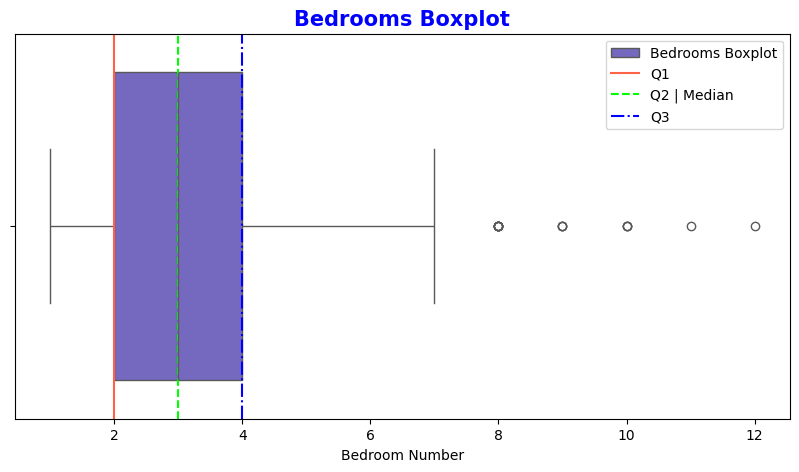

In [22]:
#Boxplot de las habitaciones con cuartiles y mediana (Q1, Q2, Q3)
plt.figure(figsize=(10,5))
sns.boxplot(bedrooms, color='slateblue', linewidth=1, label='Bedrooms Boxplot', orient='h', width=0.8, fliersize=6, ) 
plt.axvline(q1, color='tomato', linestyle='-', label='Q1', linewidth=1.5)
plt.axvline(q2, color='lime', linestyle='--', label='Q2 | Median', linewidth=1.5)
plt.axvline(q3, color='blue', linestyle='-.', label='Q3', linewidth=1.5)
plt.legend(fontsize=10, loc="upper right")
plt.title("Bedrooms Boxplot", fontsize=15, fontweight="bold", color="blue")
plt.xlabel("Bedroom Number");


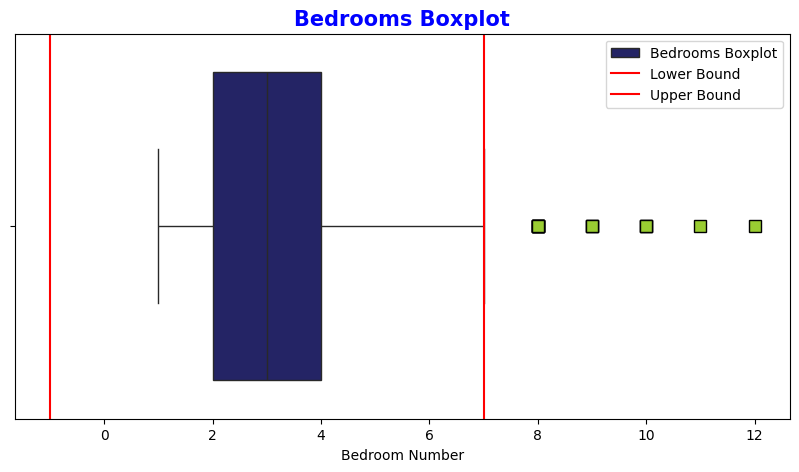

In [23]:
#Definir el rango intercuartílico. Identificacion de outliers.
plt.figure(figsize=(10,5))
sns.boxplot(bedrooms, color='midnightblue', linewidth=1, label='Bedrooms Boxplot', orient='h', width=0.8, fliersize=6, flierprops=dict(marker='s', markersize=8, markerfacecolor='yellowgreen', markeredgecolor='black'))  
plt.axvline(q1 - 1.5 * IQR, color='red', linestyle='-', label='Lower Bound', linewidth=1.5)
plt.axvline(q3 + 1.5 * IQR, color='red', linestyle='-', label='Upper Bound', linewidth=1.5)
plt.legend(fontsize=10, loc="upper right")
plt.title("Bedrooms Boxplot", fontsize=15, fontweight="bold", color="blue")
plt.xlabel("Bedroom Number");


### Baños

In [24]:
q1= np.quantile(bathrooms, 0.25)
q2= np.quantile(bathrooms, 0.5)
q3= np.quantile(bathrooms, 0.75)    
print(f"Q1: {q1:.2f}")
print(f"Q2: {q2:.2f}")
print(f"Q3: {q3:.2f}")

IQR= q3-q1
print (f"IQR: {IQR:.2f}")

Q1: 2.00
Q2: 3.00
Q3: 4.00
IQR: 2.00


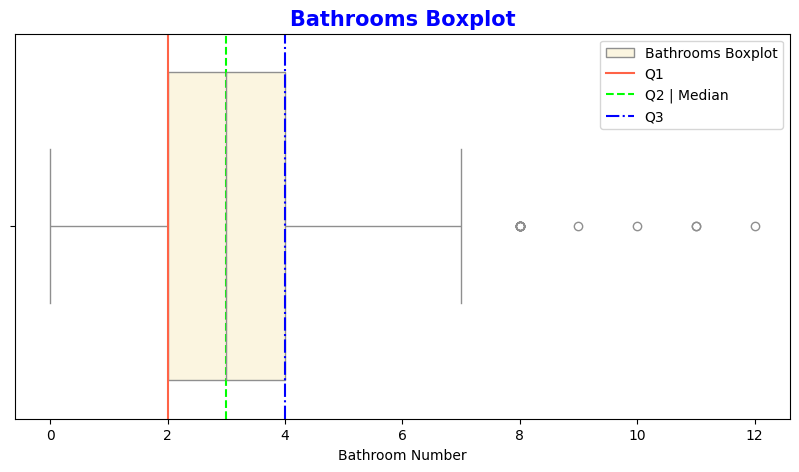

In [25]:
#Boxplot de las baños con cuartiles y mediana (Q1, Q2, Q3)
plt.figure(figsize=(10,5))
sns.boxplot(bathrooms, color='cornsilk', linewidth=1, label='Bathrooms Boxplot', orient='h', width=0.8, fliersize=6, ) 
plt.axvline(q1, color='tomato', linestyle='-', label='Q1', linewidth=1.5)
plt.axvline(q2, color='lime', linestyle='--', label='Q2 | Median', linewidth=1.5)
plt.axvline(q3, color='blue', linestyle='-.', label='Q3', linewidth=1.5)
plt.legend(fontsize=10, loc="upper right")
plt.title("Bathrooms Boxplot", fontsize=15, fontweight="bold", color="blue")
plt.xlabel("Bathroom Number");

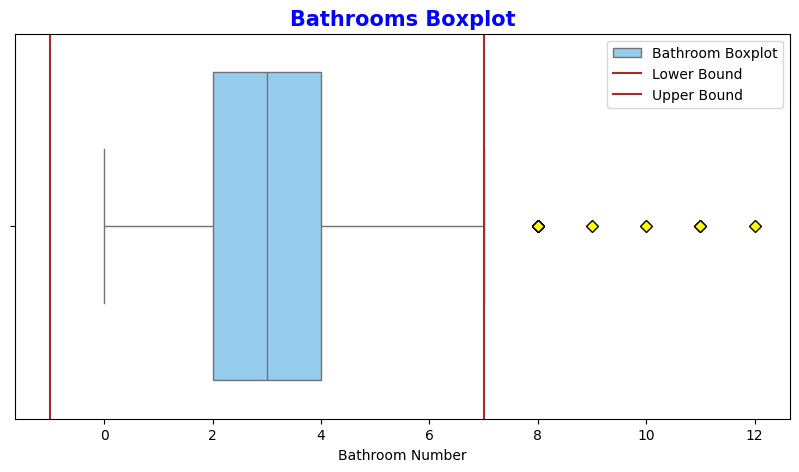

In [26]:
#Definir el rango intercuartílico. Identificacion de outliers.
plt.figure(figsize=(10,5))
sns.boxplot(bathrooms, color='lightskyblue', linewidth=1, label='Bathroom Boxplot', orient='h', width=0.8, fliersize=6, flierprops=dict(marker='D', markersize=6, markerfacecolor='yellow', markeredgecolor='black'))  
plt.axvline(q1 - 1.5 * IQR, color='brown', linestyle='-', label='Lower Bound', linewidth=1.5)
plt.axvline(q3 + 1.5 * IQR, color='brown', linestyle='-', label='Upper Bound', linewidth=1.5)
plt.legend(fontsize=10, loc="upper right")
plt.title("Bathrooms Boxplot", fontsize=15, fontweight="bold", color="blue")
plt.xlabel("Bathroom Number");

#### Tamaño

In [27]:
q1= np.quantile(size, 0.25)
q2= np.quantile(size, 0.5)
q3= np.quantile(size, 0.75)    
print(f"Q1: {q1:.2f}")
print(f"Q2: {q2:.2f}")
print(f"Q3: {q3:.2f}")

IQR= q3-q1
print (f"IQR: {IQR:.2f}")

Q1: 104.00
Q2: 158.00
Q3: 264.00
IQR: 160.00


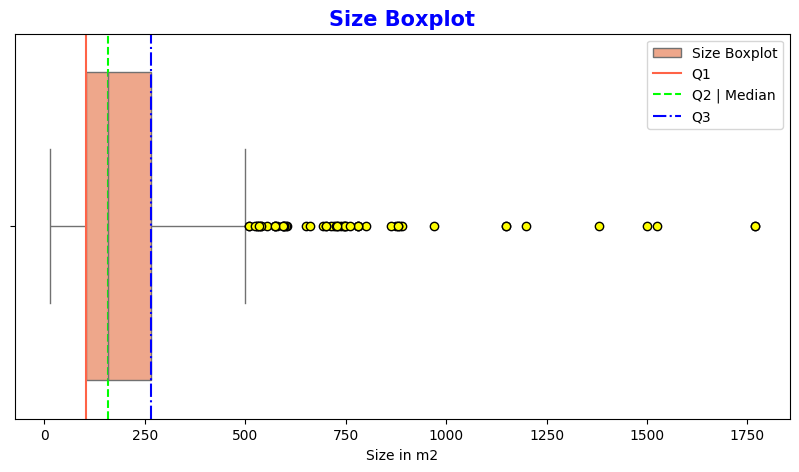

In [28]:
#Boxplot del tamaño con cuartiles y mediana (Q1, Q2, Q3)
plt.figure(figsize=(10,5))
sns.boxplot(size, color='lightsalmon', linewidth=1, label='Size Boxplot', orient='h', width=0.8, fliersize=6, flierprops=dict(marker='o', markersize=6, markerfacecolor='yellow', markeredgecolor='black'))     
plt.axvline(q1, color='tomato', linestyle='-', label='Q1', linewidth=1.5)
plt.axvline(q2, color='lime', linestyle='--', label='Q2 | Median', linewidth=1.5)
plt.axvline(q3, color='blue', linestyle='-.', label='Q3', linewidth=1.5)
plt.legend(fontsize=10, loc="upper right")
plt.title("Size Boxplot", fontsize=15, fontweight="bold", color="blue")
plt.xlabel("Size in m2");   

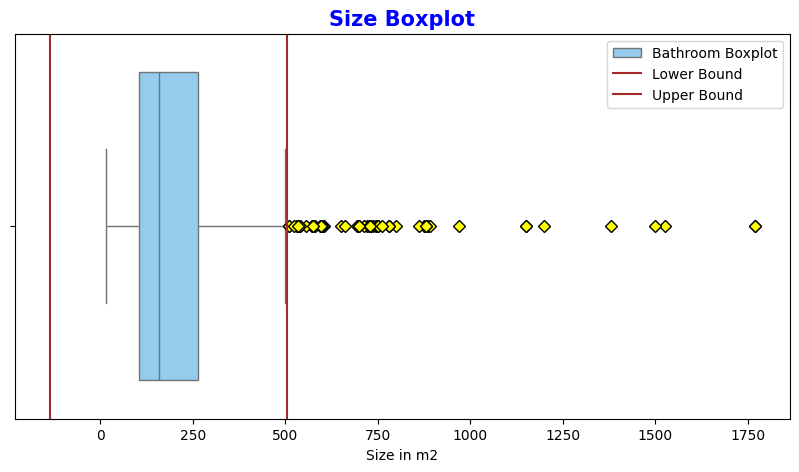

In [29]:
#Definir el rango intercuartílico. Identificacion de outliers.
plt.figure(figsize=(10,5))
sns.boxplot(size, color='lightskyblue', linewidth=1, label='Bathroom Boxplot', orient='h', width=0.8, fliersize=6, flierprops=dict(marker='D', markersize=6, markerfacecolor='yellow', markeredgecolor='black'))  
plt.axvline(q1 - 1.5 * IQR, color='brown', linestyle='-', label='Lower Bound', linewidth=1.5)
plt.axvline(q3 + 1.5 * IQR, color='brown', linestyle='-', label='Upper Bound', linewidth=1.5)
plt.legend(fontsize=10, loc="upper right")
plt.title("Size Boxplot", fontsize=15, fontweight="bold", color="blue")
plt.xlabel("Size in m2");   

### FILTRADO DE DATOS  

In [30]:
pisos_mas_baratos_20 = np.percentile(price, 20)
pisos_mas_caros_20 = np.percentile(price, 80)
numero_pisos_mas_baratos_20 = np.sum(price < pisos_mas_baratos_20) 
numero_pisos_más_caros_20 = np.sum(price > pisos_mas_caros_20)
pisos_mas_baratos_20=int(pisos_mas_baratos_20)
pisos_mas_caros_20=int(pisos_mas_caros_20)
print(f"El 20% de los pisos más baratos cuestan menos de {pisos_mas_baratos_20:.2f}") 
print(f" Hay {numero_pisos_mas_baratos_20} pisos por debajo de {pisos_mas_baratos_20:.2f}")
print(f"El 20% de los pisos más caros cuestan más de {pisos_mas_caros_20:.2f}")
print(f" Hay {numero_pisos_más_caros_20} pisos por encima de {pisos_mas_caros_20:.2f}")




El 20% de los pisos más baratos cuestan menos de 529900.00
 Hay 182 pisos por debajo de 529900.00
El 20% de los pisos más caros cuestan más de 1850000.00
 Hay 177 pisos por encima de 1850000.00


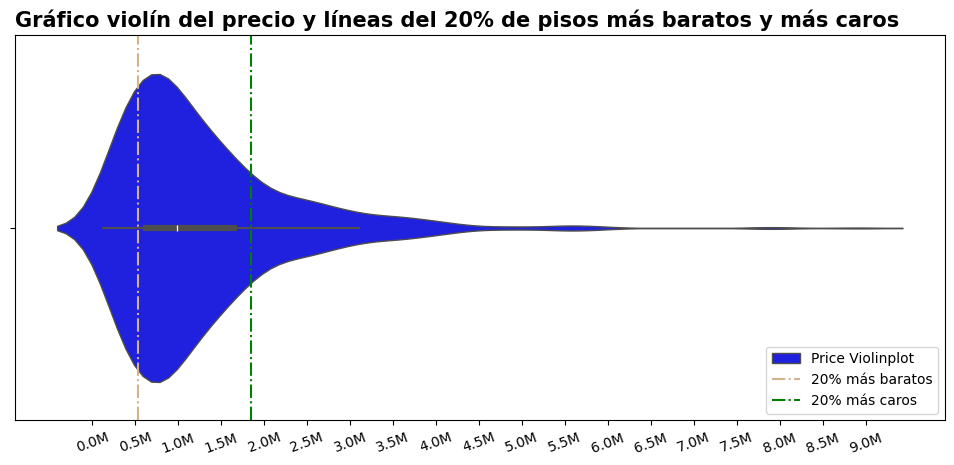

In [31]:
#filtrado de los pisos más baratos y más caros (20%)
plt.figure(figsize=(12,5))
sns.violinplot(price, color='blue', linewidth=1, label='Price Violinplot', orient='h', width=0.8 )
plt.axvline(pisos_mas_baratos_20, color='tan', linestyle='-.', label='20% más baratos', linewidth=1.5) 
plt.axvline(pisos_mas_caros_20, color='green', linestyle='-.', label='20% más caros', linewidth=1.5)
tick_positions = np.arange(0, price.max() + 500_000, 500_000)
tick_labels = [f"{x / 1_000_000:.1f}M" for x in tick_positions] 
plt.xticks(tick_positions, tick_labels, rotation=20) 
plt.legend(fontsize=10, loc="lower right")
plt.title("Gráfico violín del precio y líneas del 20% de pisos más baratos y más caros", fontsize=15, fontweight="bold", color="black", loc="left");    


In [32]:
import pandas as pd

In [33]:
listado= pd.read_csv ('idealista_madrid.csv', delimiter=',', encoding='utf-8')
print(listado.head(5))

     price  baths  rooms  sqft     address
0  1920000      3      3   183   Recoletos
1  1995000      3      3   170  Castellana
2  1300000      3      4   270   Hortaleza
3  1650000      3      3   248   Chamartín
4  1590750      3      3   116   Recoletos


In [34]:
#Barrios mas bartos (20%)
promedio_precios_por_barrio = listado.groupby('address')['price'].mean().reset_index()
promedio_precios_por_barrio['price'] = promedio_precios_por_barrio['price'].astype(int)
promedio_precios_por_barrio_ordenado = promedio_precios_por_barrio.sort_values('price', ascending=True)
barrios_mas_baratos_20= promedio_precios_por_barrio_ordenado.head(int(len(promedio_precios_por_barrio_ordenado)*0.2))   
print(f" Listado barrios mas baratos (20%):\n{barrios_mas_baratos_20.to_string(index=False)}")

 Listado barrios mas baratos (20%):
                        address  price
                      San Diego 152500
          12 de Octubre-Orcasur 155000
                          Zofío 164000
Ensanche de Vallecas - La Gavia 179000
                     San Fermín 179000
                   Vista Alegre 197450
                    Los Ángeles 222000
             Puente de Vallecas 225000
                         Ventas 226225
                    Buena Vista 230000
                     San Isidro 247250
                        Amposta 255900
                   Pueblo Nuevo 259846
                         Opañel 260000
                       Butarque 265000
                         Latina 270000
                      Moratalaz 300000
                          Rejas 310750
                       Quintana 319600
                  Bellas Vistas 325000
                        Chopera 330000


In [35]:
from collections import Counter

In [36]:
#Cálculo de Moda de address
conteo= Counter(listado['address'])
conteo.items()
moda_barrio, moda_conteo = conteo.most_common(1)[0]
print(f" La moda de address es el {moda_barrio} que aparece {moda_conteo} veces")

 La moda de address es el Barrio de Salamanca que aparece 63 veces


In [37]:
#Moda barriso mas baratos y más caros, (opcional)

### DISPERSIÓN: VARIANZA Y DESVIACIÓN ESTANDAR

### Precio

In [38]:
#Dispersioón y varianza de los precios

np.var(price)
np.std(price)
(f"La varianza de los precios es {price.var():.0f}. La desviación estándar de los precios es {price.std():.0f}")
 

'La varianza de los precios es 1073448095137. La desviación estándar de los precios es 1036073'

### Habitaciones

In [39]:

np.var(bedrooms)
np.std(bedrooms)
(f"La varianza de las habitaciones es {bedrooms.var():.6f}.La desviación estándar de las habitaciones es {bedrooms.std():.6f}")

'La varianza de las habitaciones es 2.642568.La desviación estándar de las habitaciones es 1.625598'

### Baños

In [40]:

np.var(bathrooms)
np.std(bathrooms)
(f"La varianza de los baños es {bathrooms.var():.6f}. La desviación estándar de los baños es {bathrooms.std():.6f}")

'La varianza de los baños es 2.540051. La desviación estándar de los baños es 1.593754'

### Metros 2

In [41]:

np.var(size)
np.std(size)
(f"La varianza de los m2 es {size.var():.2f}. La desviación estándar de los m2 es {size.std():.2f}")

'La varianza de los m2 es 36726.28. La desviación estándar de los m2 es 191.64'

##  Filtro de outliers: tukey, z-score, marcar en un gráfico los límites de outliers: rojo y azul.

### Z-score Precio

In [42]:

def outliers_z_score(price, z = 3):
    mean = np.mean(price)
    std = np.std(price)
    lim_l = mean - 3*std
    lim_r = mean + 3*std
    
    outliers= [elem for elem in price if elem < lim_l or elem > lim_r]

    normal_data = [elem for elem in price if elem not in outliers]

    return np.array(normal_data), np.array(outliers)

In [43]:
normal_data, outliers_price = outliers_z_score(price)
print(f" No-Outliers: {len (normal_data)}")
print(f" Outliers: {len (outliers_price)}")
print (outliers_price)

 No-Outliers: 901
 Outliers: 14
[5700000 4950000 7900000 5500000 5500000 5000000 5900000 5500000 8900000
 5900000 4500000 5500000 4750000 7900000]


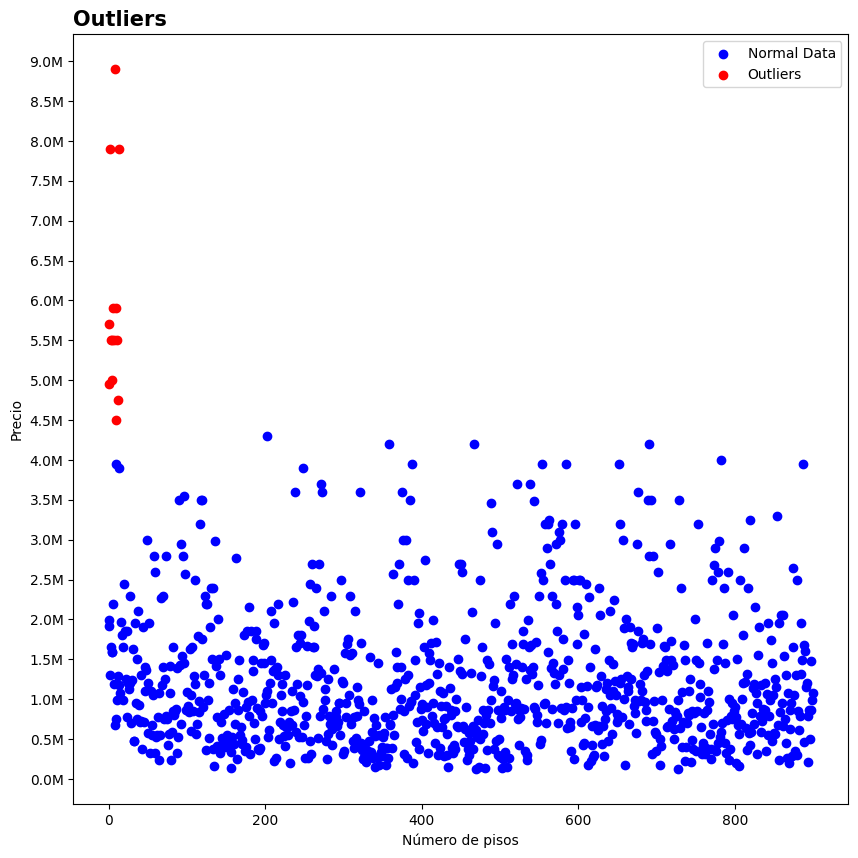

In [44]:
#representacion de outliers con grafica de scatter plot
plt.figure(figsize=(10,10))
plt.scatter(range(len(normal_data)), normal_data, color='blue', label='Normal Data')
plt.scatter(range(len(outliers_price)), outliers_price, color='red', label='Outliers')
yticks = np.arange(0, np.max(price) + 500_000, 500_000)  # Intervalos de 500,000
ytick_labels = [f"{y / 1_000_000:.1f}M" for y in yticks]  # Etiquetas en millones
plt.yticks(yticks, ytick_labels)
plt.legend(fontsize=10, loc="upper right")
plt.title("Outliers", fontsize=15, fontweight="bold", color="black", loc="left")
plt.xlabel("Número de pisos")
plt.ylabel("Precio");


In [45]:
mean = np.mean(price)
print(f"Mean: {mean:.2f}")
std = np.std(price)
print(f"Std: {std:.2f}")

lim_l = mean - 3*std
print(f"Lower Bound: {lim_l:.2f}")
lim_r = mean + 3*std
print(f"Upper Bound: {lim_r:.2f}")

Mean: 1290575.26
Std: 1036073.40
Lower Bound: -1817644.94
Upper Bound: 4398795.47


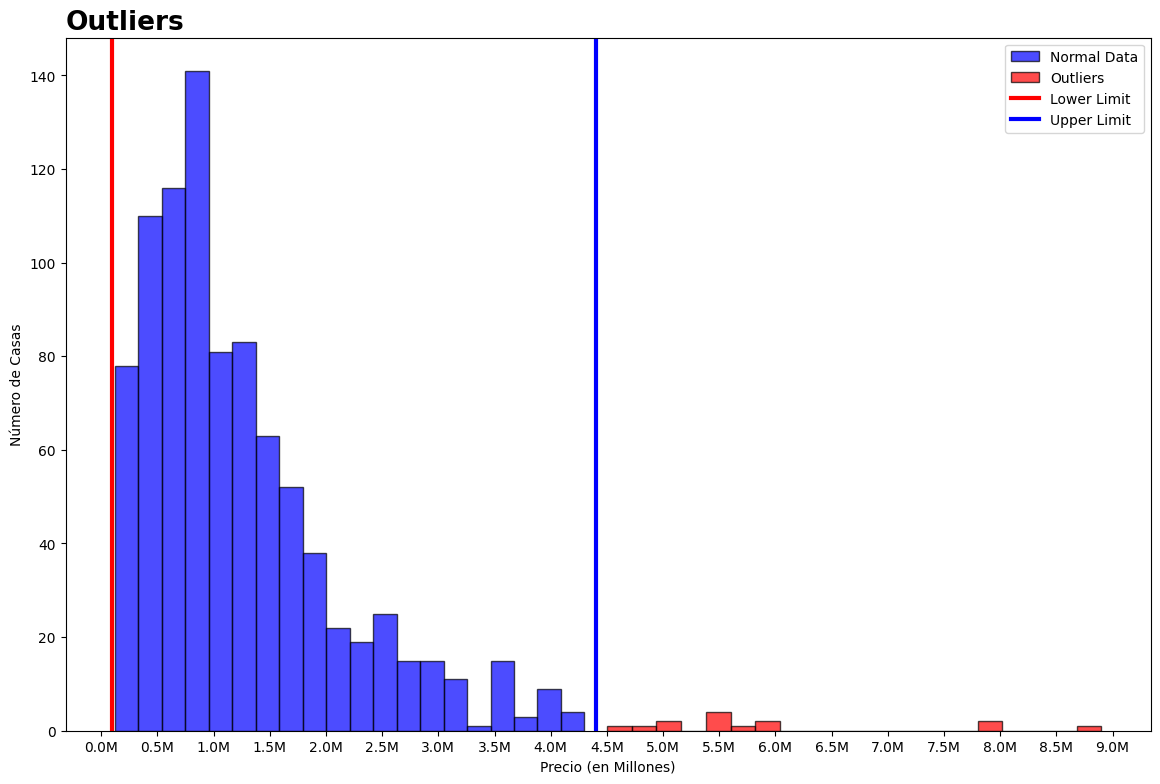

In [46]:
plt.figure(figsize=(14, 9))
plt.hist(normal_data, bins=20, color='blue', alpha=0.7, edgecolor='black', label='Normal Data')
plt.hist(outliers_price, bins=20, color='red', alpha=0.7, edgecolor='black', label='Outliers')
plt.axvline(100_000, color='red', linestyle='-', label='Lower Limit', linewidth=3) #fuera de rango, no hay outliers
plt.axvline(lim_r, color='blue', linestyle='-', label='Upper Limit', linewidth=3)
xticks = np.arange(0, np.max(price) + 500000, 500000)
plt.xticks(xticks, [f'{x / 1_000_000:.1f}M' for x in xticks])
plt.legend(fontsize=10, loc="upper right")
plt.title("Outliers", fontsize=19, fontweight="bold", color="black", loc="left")
plt.xlabel("Precio (en Millones)")
plt.ylabel("Número de Casas")
plt.show()

### Valla de Tukey Precio

In [47]:
def outliers_tukey(price, k = 1.5):
    q1 = np.quantile(price, 0.25)
    q3 = np.quantile(price, 0.75)
    
    ric = q3 - q1
    
    lim_le = q1 - k*ric
    lim_ri = q3 + k*ric
    outliers_price = [elem for elem in price if elem < lim_le or elem > lim_ri]
    normal_data = [elem for elem in price if elem >= lim_le and elem <= lim_ri]
    return np.array(normal_data), np.array(outliers_price)
    #normal_data, outliers_price = outliers_tukey(price)
print(f"Datos normales (primeros 20): {normal_data[:20]}")
print(f"Outliers (primeros 20): {outliers_price[:14]}")

Datos normales (primeros 20): [1920000 1995000 1300000 1650000 1590750 1590000 2190000 1190000  675000
 3950000  752248  995000 1295000 3900000 1175000 1075000 1970000 1800000
  990000 1650000]
Outliers (primeros 20): [5700000 4950000 7900000 5500000 5500000 5000000 5900000 5500000 8900000
 5900000 4500000 5500000 4750000 7900000]


In [48]:
print(f"Total de no-outliers: {len(normal_data)}")
print(f"Total de outliers: {len(outliers_price)}")

print(outliers_price)

Total de no-outliers: 901
Total de outliers: 14
[5700000 4950000 7900000 5500000 5500000 5000000 5900000 5500000 8900000
 5900000 4500000 5500000 4750000 7900000]


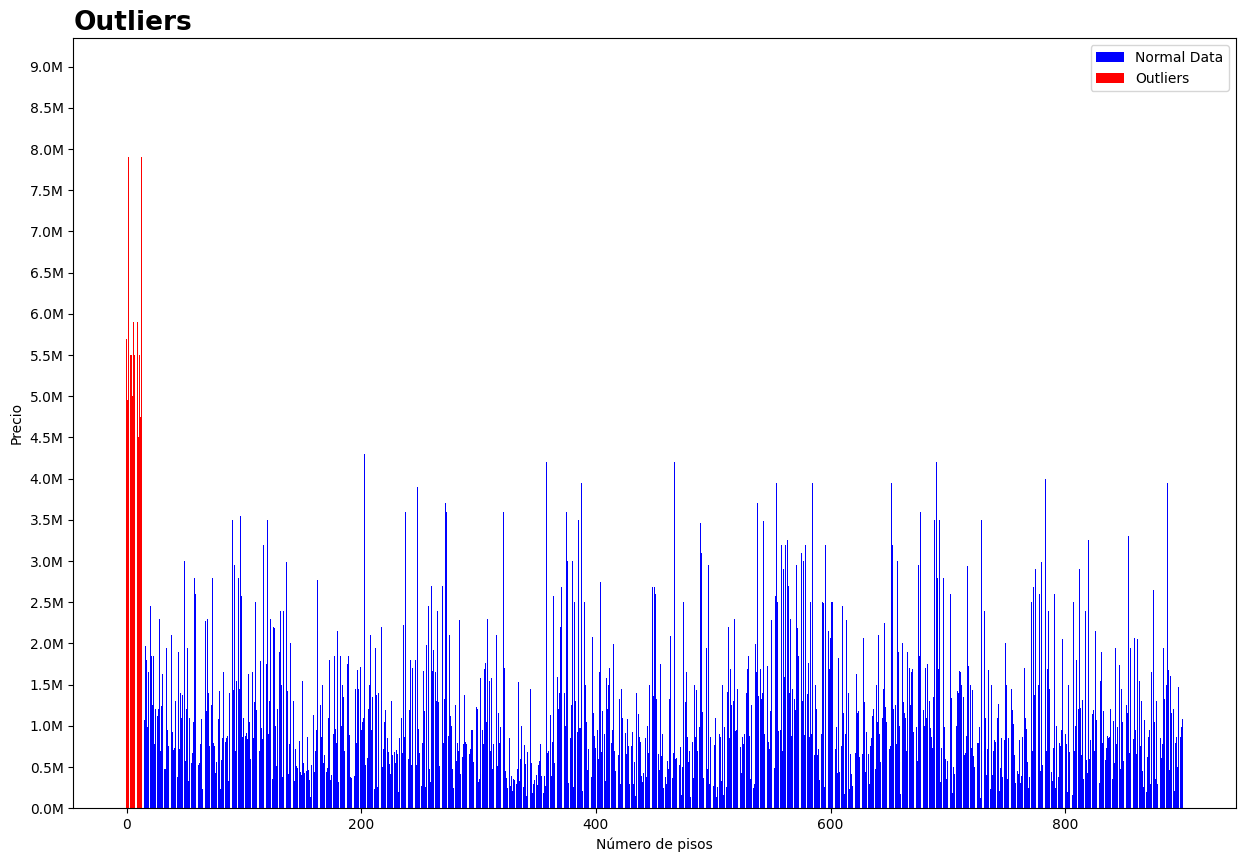

In [49]:
plt.figure(figsize=(15,10))
plt.bar(range(len(normal_data)), normal_data, color='blue', label='Normal Data')
plt.bar(range(len(outliers_price)), outliers_price, color='red', label='Outliers')
yticks = np.arange(0, np.max(price) + 500_000, 500_000)  
ytick_labels = [f"{y / 1_000_000:.1f}M" for y in yticks]  
plt.yticks(yticks, ytick_labels)
plt.legend(fontsize=10, loc="upper right")
plt.title("Outliers", fontsize=19, fontweight="bold", color="black", loc="left")
plt.xlabel("Número de pisos")
plt.ylabel("Precio");
plt.show()

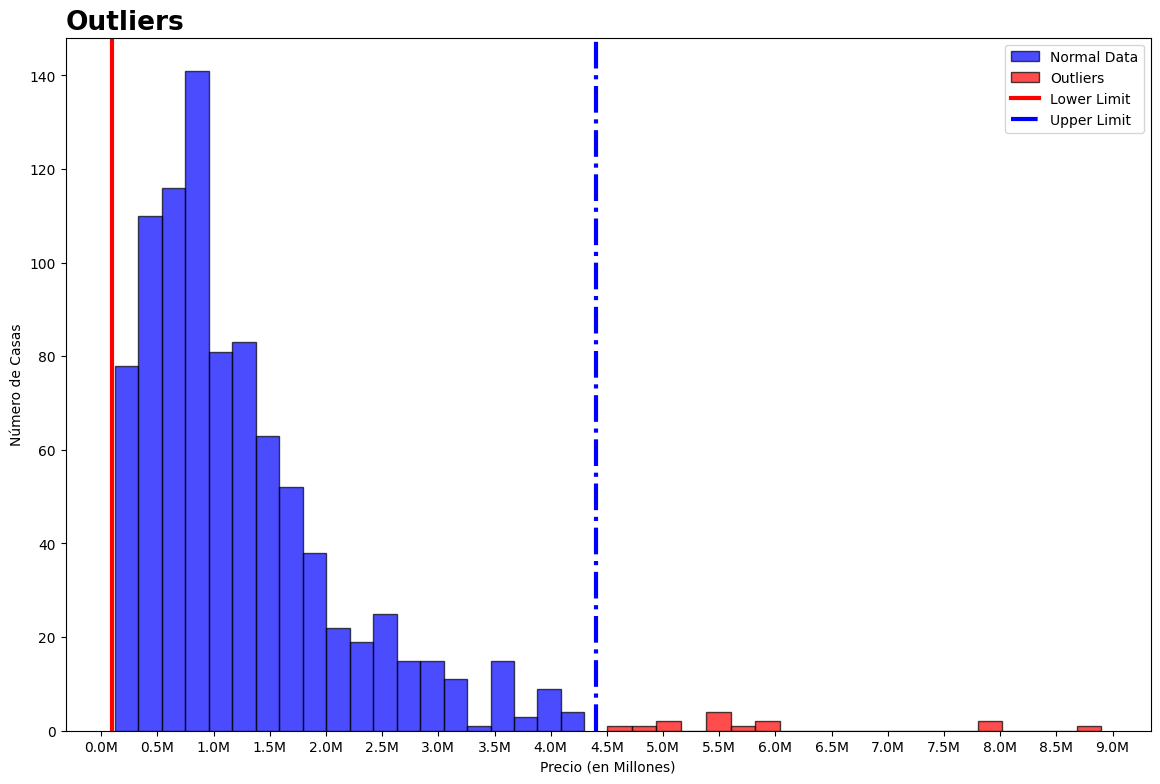

In [50]:
plt.figure(figsize=(14, 9))
plt.hist(normal_data, bins=20, color='blue', alpha=0.7, edgecolor='black', label='Normal Data')
plt.hist(outliers_price, bins=20, color='red', alpha=0.7, edgecolor='black', label='Outliers')  
plt.axvline(100_000, color='red', linestyle='-', label='Lower Limit', linewidth=3) #fuera de rango, no hay outliers
plt.axvline(lim_r, color='blue', linestyle='-.', label='Upper Limit', linewidth=3)
xticks = np.arange(0, np.max(price) + 500000, 500000)
plt.xticks(xticks, [f'{x / 1_000_000:.1f}M' for x in xticks])
plt.legend(fontsize=10, loc="upper right")
plt.title("Outliers", fontsize=19, fontweight="bold", color="black", loc="left")    
plt.xlabel("Precio (en Millones)")
plt.ylabel("Número de Casas")
plt.show()

### Z-Score M2 

In [51]:

def outliers_z_score(size, z = 3):
    mean = np.mean(size)
    std = np.std(size)
    lim_l = mean - 3*std
    lim_r = mean + 3*std
    
    outliers= [elem for elem in size if elem < lim_l or elem > lim_r]

    normal_data = [elem for elem in size if elem not in outliers]

    return np.array(normal_data), np.array(outliers)

In [52]:
normal_data, outliers_size = outliers_z_score(size)
print(f" No-Outliers: {len (normal_data)}")
print(f" Outliers: {len (outliers_size)}")
print (outliers_size)

 No-Outliers: 899
 Outliers: 16
[ 886 1150 1525  890 1500  800  875  881  862 1150 1380  881 1200 1768
  969 1768]


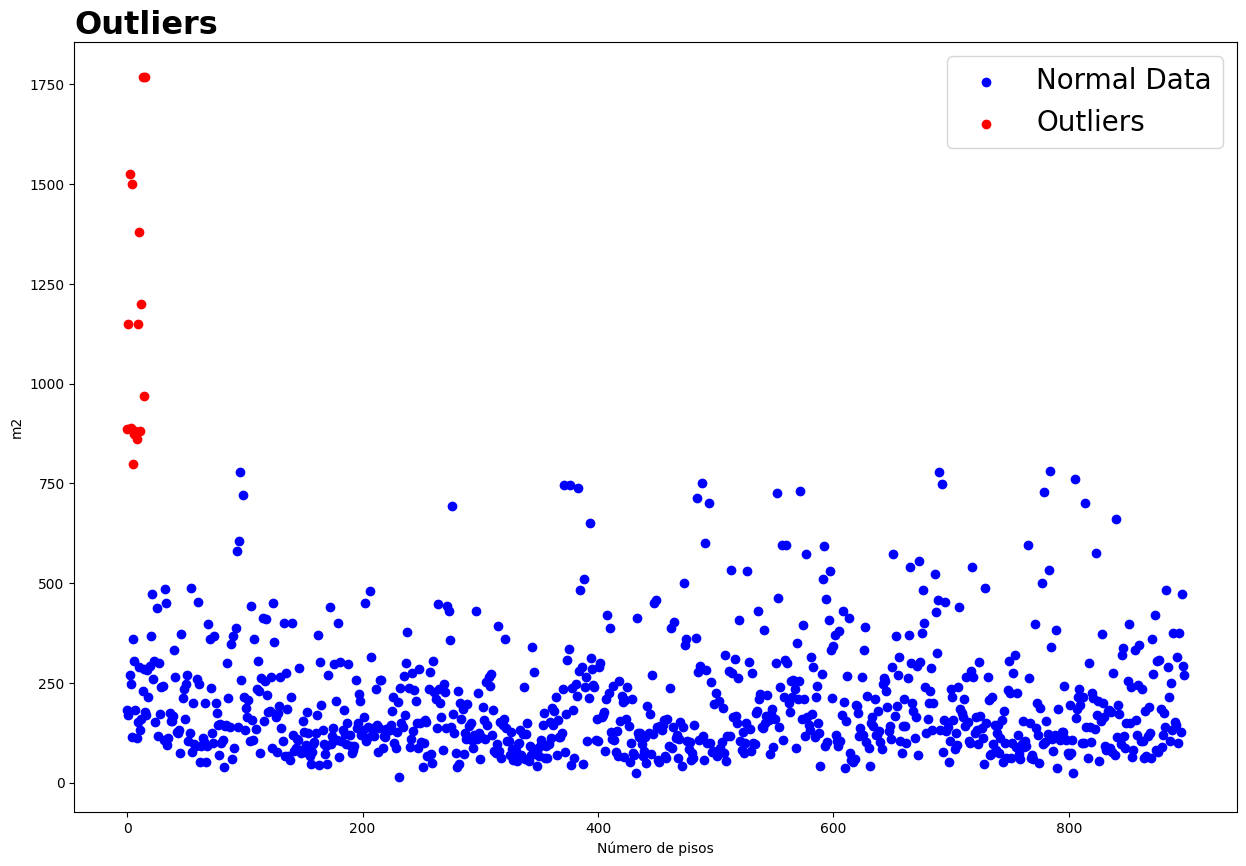

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(range(len(normal_data)), normal_data, color='blue', label='Normal Data')
plt.scatter(range(len(outliers_size)), outliers_size, color='red', label='Outliers')
plt.legend(fontsize=20, loc="upper right")
plt.title("Outliers", fontsize=23, fontweight="bold", color="black", loc="left")
plt.xlabel("Número de pisos")
plt.ylabel("m2");



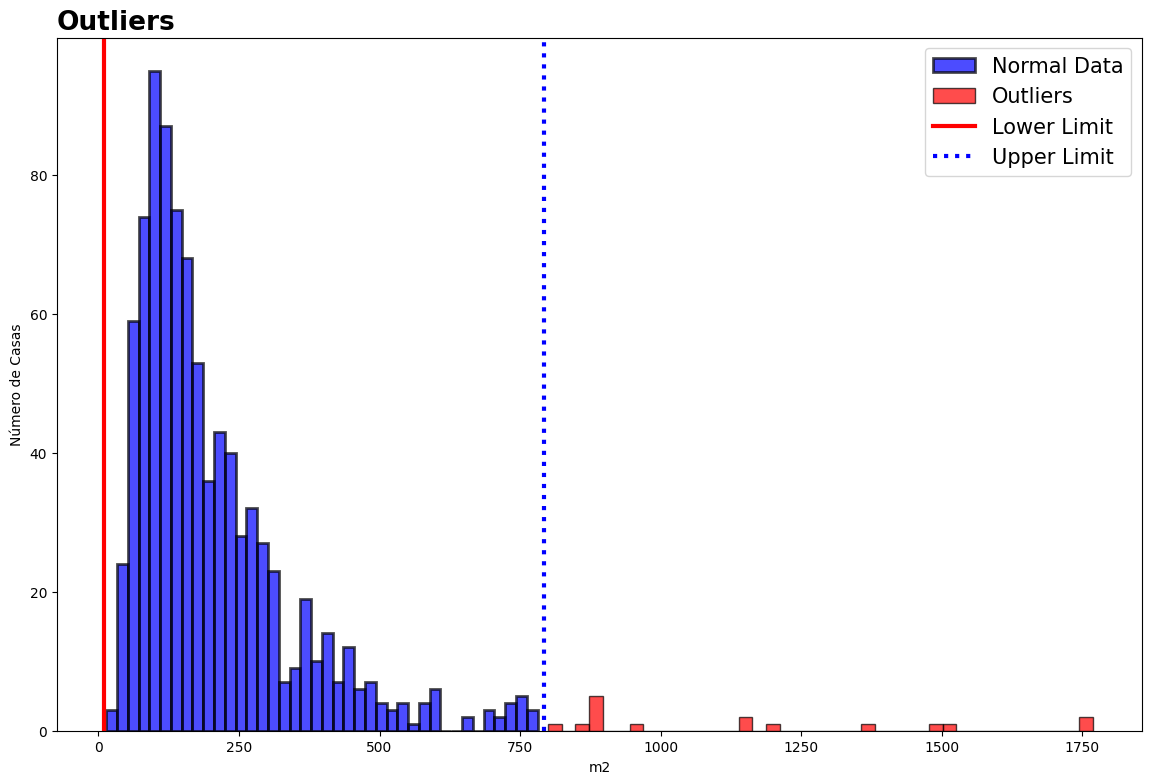

In [54]:
mean = np.mean(size)
std = np.std(size)


lim_l = mean - 3*std
lim_r = mean + 3*std




plt.figure(figsize=(14, 9))
plt.hist(normal_data, bins=40, color='blue', alpha=0.7, edgecolor='black', label='Normal Data', linewidth=2),
plt.hist(outliers_size, bins=40, color='red', alpha=0.7, edgecolor='black', label='Outliers')
plt.axvline(10, color='red', linestyle='-', label='Lower Limit', linewidth=3) 
plt.axvline(lim_r, color='blue', linestyle='dotted', label='Upper Limit', linewidth=3)
plt.legend(fontsize=15, loc="upper right")
plt.title("Outliers", fontsize=19, fontweight="bold", color="black", loc="left")
plt.xlabel("m2")
plt.ylabel("Número de Casas")
plt.show()

### Valla de Turkey M2

In [55]:
def outliers_tukey(size, k = 1.5):
    q1 = np.quantile(size, 0.25)
    q3 = np.quantile(size, 0.75)
    
    ric = q3 - q1
    
    lim_le = q1 - k*ric
    lim_ri = q3 + k*ric
    print (lim_le, lim_ri)
    
    outliers_size = [elem for elem in size if elem < lim_le or elem > lim_ri]
    normal_data = [elem for elem in size if elem >= lim_le and elem <= lim_ri]
    return np.array(normal_data), np.array(outliers_size)
    #normal_data, outliers_price = outliers_tukey(price)
print(f"Datos normales (primeros 20): \n {normal_data[:20]}")
print(f"Outliers (16): \n {outliers_size[:16]}")

Datos normales (primeros 20): 
 [183 170 270 248 116 360 305 183 112 153 291 132 160 229 284 178 169 283
 214 292]
Outliers (16): 
 [ 886 1150 1525  890 1500  800  875  881  862 1150 1380  881 1200 1768
  969 1768]


In [56]:
print(f"Total de no-outliers: {len(normal_data)}")
print(f"Total de outliers: {len(outliers_size)}")

print(outliers_size)

Total de no-outliers: 899
Total de outliers: 16
[ 886 1150 1525  890 1500  800  875  881  862 1150 1380  881 1200 1768
  969 1768]


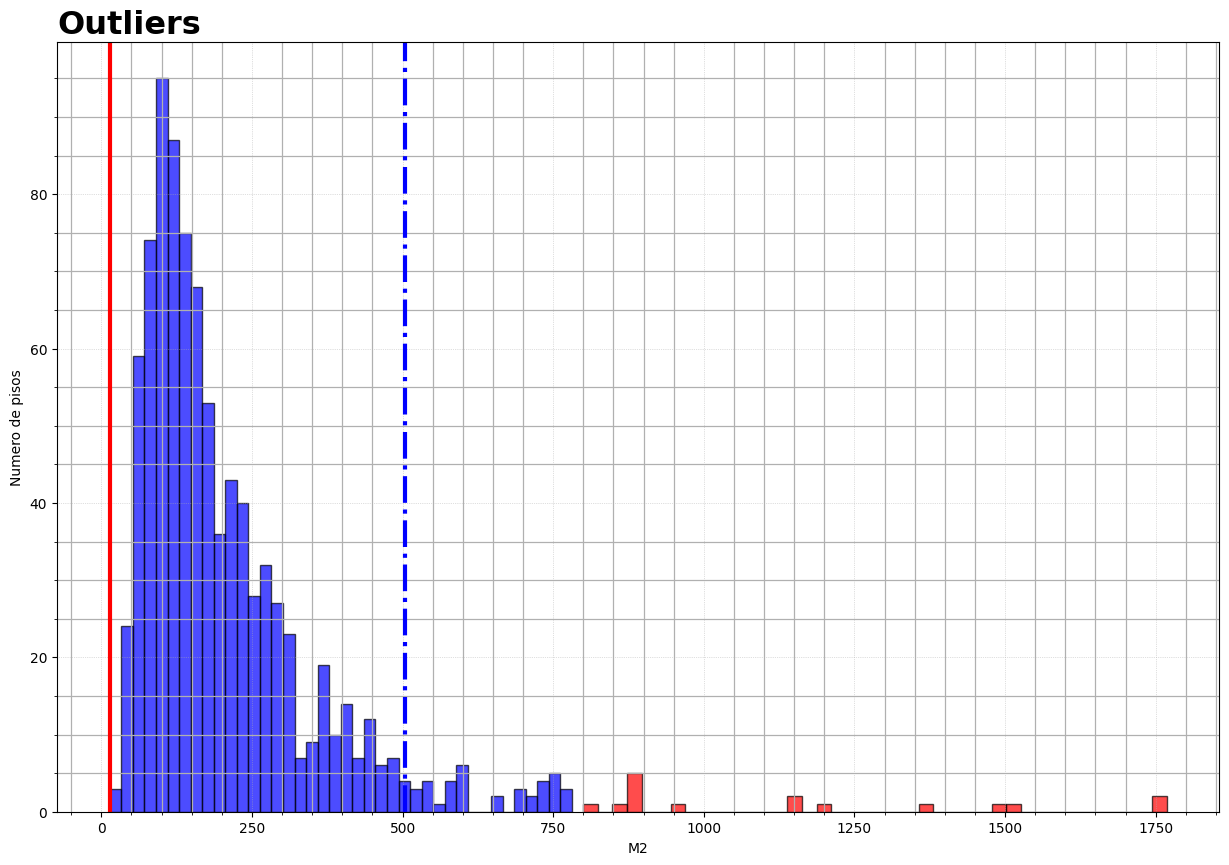

In [57]:
q1 = np.quantile(size, 0.25)
q3 = np.quantile(size, 0.75)
ric = q3 - q1
    
lim_le = q1 - 1.5*ric
lim_ri = q3 + 1.5*ric

plt.figure(figsize=(15,10))
plt.hist(normal_data, bins=40, color='blue', alpha=0.7, edgecolor='black', label='Normal Data')
plt.hist(outliers_size, bins=40, color='red', alpha=0.7, edgecolor='black', label='Outliers')
plt.axvline(15, color='red', linestyle='-', label='Lower Limit', linewidth=3)               
plt.axvline(lim_ri, color='blue', linestyle='-.', label='Upper Limit', linewidth=3)  
plt.title("Outliers", fontsize=23, fontweight="bold", color="black", loc="left")
plt.xlabel("M2")
plt.grid(True, which='major', linestyle='dotted', linewidth=0.5, alpha=0.8)
plt.minorticks_on()  
plt.grid(True, which='minor', linestyle='-', linewidth=0.9, alpha=1)
plt.ylabel("Numero de pisos");
plt.show()


#no entiendo porque me coloca el limite superior en 500 cuando deberi ser 800

## Correlación: calcular la matriz y pintarla con matplotlib/seaborn

- 0: asociación nula.
- 土 0.1: asociación pequeña.
- 土 0.3: asociación mediana.
- 土 0.5: asociación moderada.
- 土 0.7: asociación alta.
- 土 0.9: asociación muy alta.

In [58]:
variables = [price, bedrooms, bathrooms, size]

matriz = list()

for variable1 in variables:
    
    fila = list()
    
    for variable2 in variables:
        
        fila.append(stats.pearsonr(variable1, variable2)[0])
        
    matriz.append(fila)
    
np.array(matriz)

array([[1.        , 0.69162529, 0.55718932, 0.68176241],
       [0.69162529, 1.        , 0.77076481, 0.81873292],
       [0.55718932, 0.77076481, 1.        , 0.71265478],
       [0.68176241, 0.81873292, 0.71265478, 1.        ]])

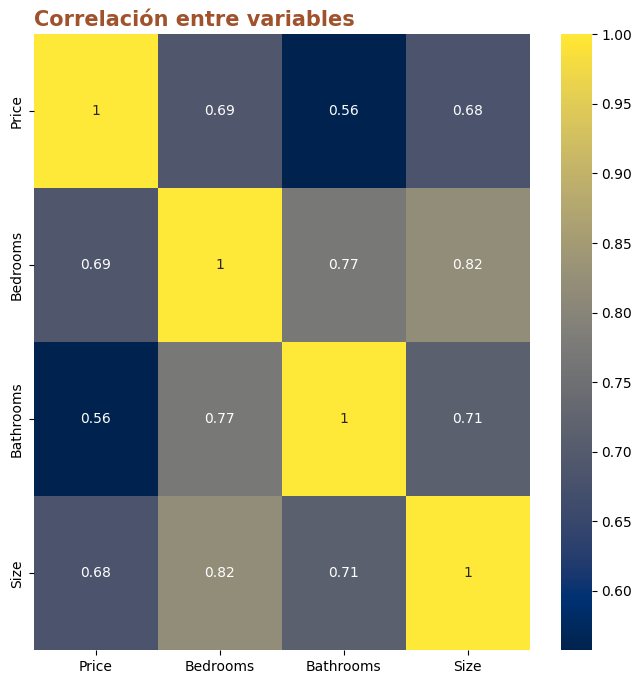

In [59]:
plt.figure(figsize=(8, 8))
sns.heatmap(matriz, annot=True, cmap='cividis', xticklabels=['Price', 'Bedrooms', 'Bathrooms', 'Size'], yticklabels=['Price', 'Bedrooms', 'Bathrooms', 'Size'])

plt.title("Correlación entre variables", fontsize=15, fontweight="bold", color="Sienna", loc="left")
plt.show()

## Estandarización

### Habitaciones y baños

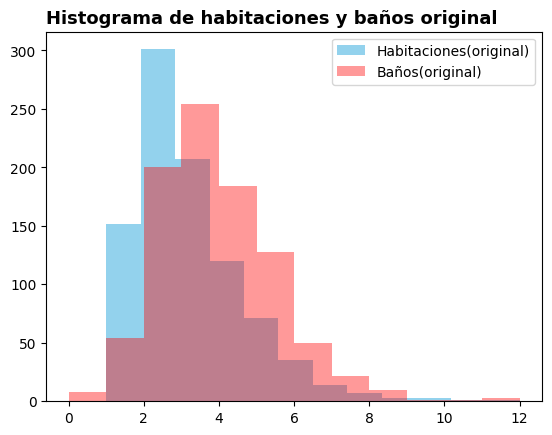

In [179]:
plt.hist(bedrooms, bins=12, color="skyblue", alpha=0.9, label="Habitaciones(original)")
plt.hist(bathrooms, bins=12, color="red",  alpha=0.4, label="Baños(original)")
plt.title("Histograma de habitaciones y baños original", fontsize=13, fontweight="bold", color="black", loc="left")
plt.legend();

In [171]:
# Original
mean_bedrooms = np.mean(bedrooms)
mean_bathrooms = np.mean(bathrooms)

median_bedrooms = np.median(bedrooms)
median_bathrooms = np.median(bathrooms)

std_bedrooms= np.std(bedrooms)
std_bathrooms = np.std(bathrooms)

print(f"Media original bedrooms: {mean_bedrooms}")
print(f"Mediana original bedrooms: {median_bedrooms}")
print(f"Desviación estandar origiginal bedrooms: {std_bedrooms}")

print(f"Media original bathrooms: {mean_bathrooms}")
print(f"Mediana original bathrooms: {median_bathrooms}")
print(f"Desviación estandar original bathrooms: {std_bathrooms}")

Media original bedrooms: 2.900546448087432
Mediana original bedrooms: 3.0
Desviación estandar origiginal bedrooms: 1.625597738496648
Media original bathrooms: 3.4743169398907106
Mediana original bathrooms: 3.0
Desviación estandar original bathrooms: 1.5937536707211326


In [172]:
bedrooms_estandarizado= (bedrooms - mean_bedrooms) / std_bedrooms
bathrooms_estandarizado = (bathrooms - mean_bathrooms) / std_bathrooms


print(bedrooms_estandarizado[:5])
print(bathrooms_estandarizado[:5])

[0.06117968 0.06117968 0.06117968 0.06117968 0.06117968]
[-0.29760994 -0.29760994  0.32983959 -0.29760994 -0.29760994]


In [173]:
# estandarizado
mean_bedrooms = np.mean(bedrooms_estandarizado)
mean_bathrooms = np.mean(bathrooms_estandarizado)

median_bedrooms = np.median(bedrooms_estandarizado)
median_bathrooms = np.median(bathrooms_estandarizado)

std_bedrooms = np.std(bedrooms_estandarizado)
std_bathrooms = np.std(bathrooms_estandarizado)

print(f"Media estandarizado bedrooms: {mean_bedrooms}")
print(f"Mediana estandarizado bedrooms: {median_bedrooms}")
print(f"Desviación estandar estandarizado bedrooms: {std_bedrooms}")

print(f"Media estandarizado bathrooms: {mean_bathrooms}")
print(f"Mediana estandarizado bathrooms: {median_bathrooms}")
print(f"Desviación estandar estandarizado bathrooms: {std_bathrooms}")

Media estandarizado bedrooms: -1.397788988380525e-16
Mediana estandarizado bedrooms: 0.06117968151490091
Desviación estandar estandarizado bedrooms: 1.0
Media estandarizado bathrooms: -1.2424791007826888e-16
Mediana estandarizado bathrooms: -0.2976099434965344
Desviación estandar estandarizado bathrooms: 0.9999999999999999


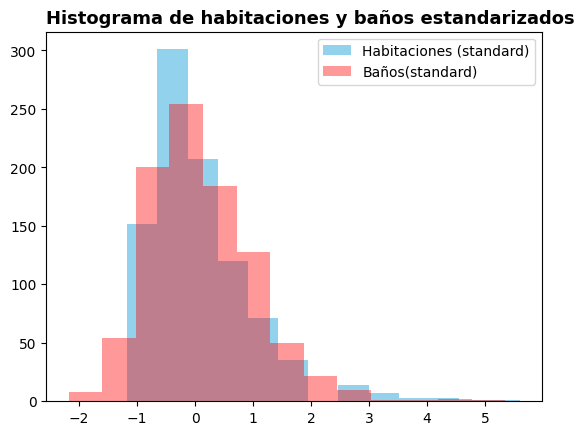

In [177]:
plt.hist(bedrooms_estandarizado, bins=13, color="skyblue", alpha=0.9, label="Habitaciones (standard)")
plt.hist(bathrooms_estandarizado, bins=13, color="red",  alpha=0.4, label="Baños(standard)")
plt.title("Histograma de habitaciones y baños estandarizados", fontsize=13, fontweight="bold", color="black", loc="left")
plt.legend();

## Comparativa de la distribución original y estandarizada

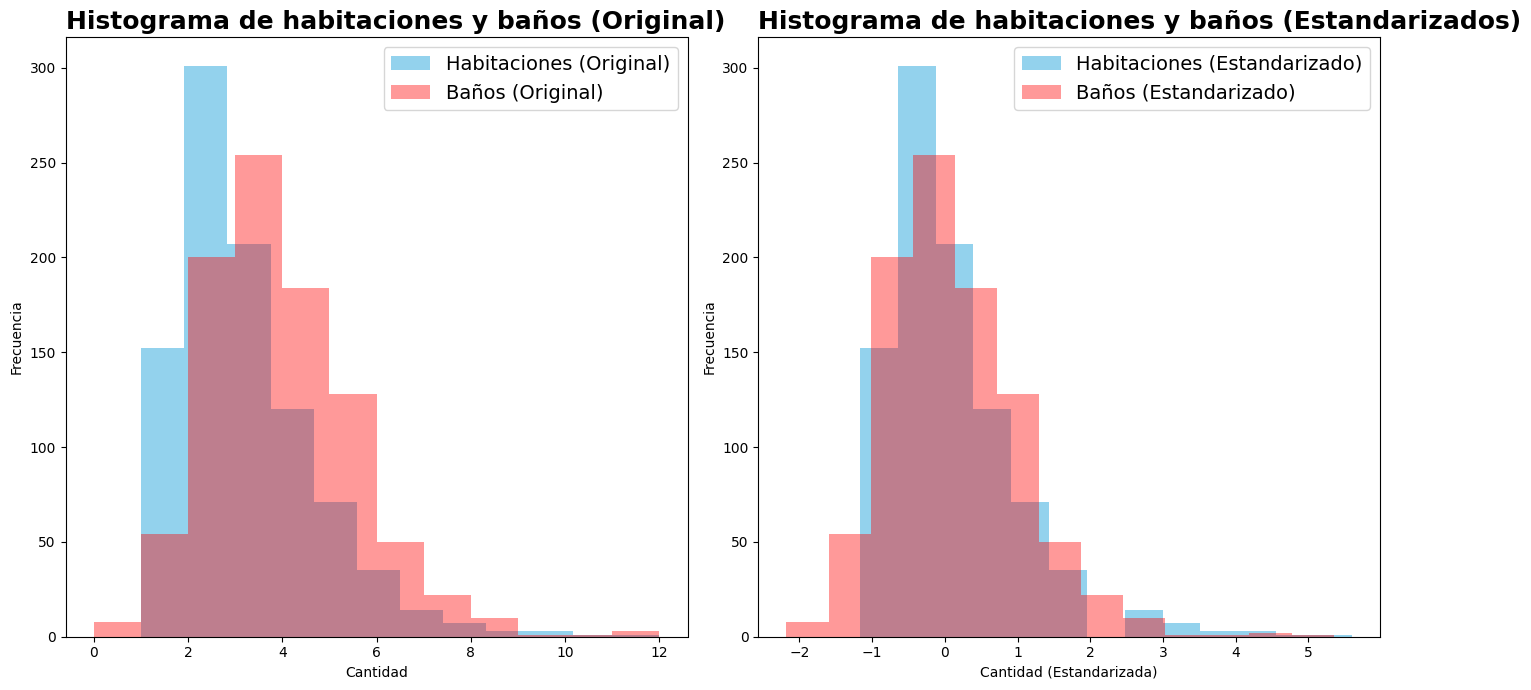

In [200]:
import matplotlib.pyplot as plt

# Crear una figura con 2 subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].hist(bedrooms, bins=12, color="skyblue", alpha=0.9, label="Habitaciones (Original)")
axes[0].hist(bathrooms, bins=12, color="red", alpha=0.4, label="Baños (Original)")
axes[0].set_title("Histograma de habitaciones y baños (Original)", fontsize=18, fontweight="bold", loc="left")
axes[0].legend(fontsize=14, loc="upper right")
axes[0].set_xlabel("Cantidad")
axes[0].set_ylabel("Frecuencia")
axes[1].hist(bedrooms_estandarizado, bins=13, color="skyblue", alpha=0.9, label="Habitaciones (Estandarizado)")
axes[1].hist(bathrooms_estandarizado, bins=13, color="red", alpha=0.4, label="Baños (Estandarizado)")
axes[1].set_title("Histograma de habitaciones y baños (Estandarizados)", fontsize=18, fontweight="bold", loc="left")
axes[1].legend(fontsize=14, loc="upper right")
axes[1].set_xlabel("Cantidad (Estandarizada)")
axes[1].set_ylabel("Frecuencia")
plt.tight_layout()
plt.show()


### Precio original y estandarizado

In [60]:
print(f"Media: {np.mean(price)}")
print(f"Mediana: {np.median(price)}")
print(f"Moda: {stats.mode(price)[0]}")

print(f"std: {np.std(price)}")

Media: 1290575.262295082
Mediana: 990000.0
Moda: 850000
std: 1036073.4023886833


In [219]:
media = np.mean(price)

std = np.std(price)

precio_estandarizado = (price - media) / std

print(f"Media Precio estandarizado: {np.mean(precio_estandarizado)}")
print(f"Mediana Precio estandarizado: {np.median(precio_estandarizado)}")
print(f"Moda: Precio estandarizado {stats.mode(precio_estandarizado)[0]}")

print(f"Desviacion estándar: {np.std(precio_estandarizado)}")


Media Precio estandarizado: -1.9413735949729513e-17
Mediana Precio estandarizado: -0.290110007265992
Moda: Precio estandarizado -0.4252355685218141
Desviacion estándar: 0.9999999999999999


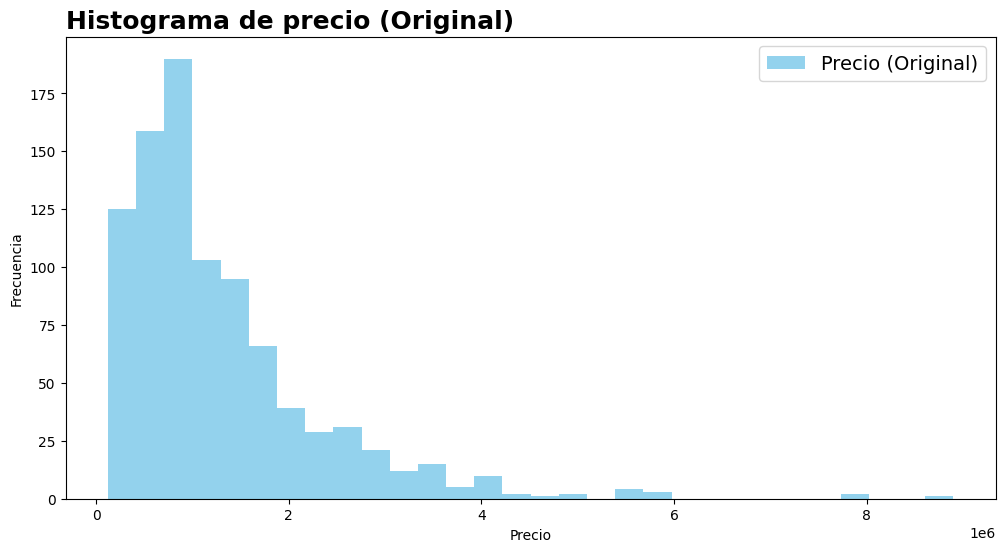

In [221]:
plt.figure(figsize=(12,6))
plt.hist(price, bins=30, color="skyblue", alpha=0.9, label="Precio (Original)")
plt.title("Histograma de precio (Original)", fontsize=18, fontweight="bold", loc="left")
plt.legend(fontsize=14, loc="upper right")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

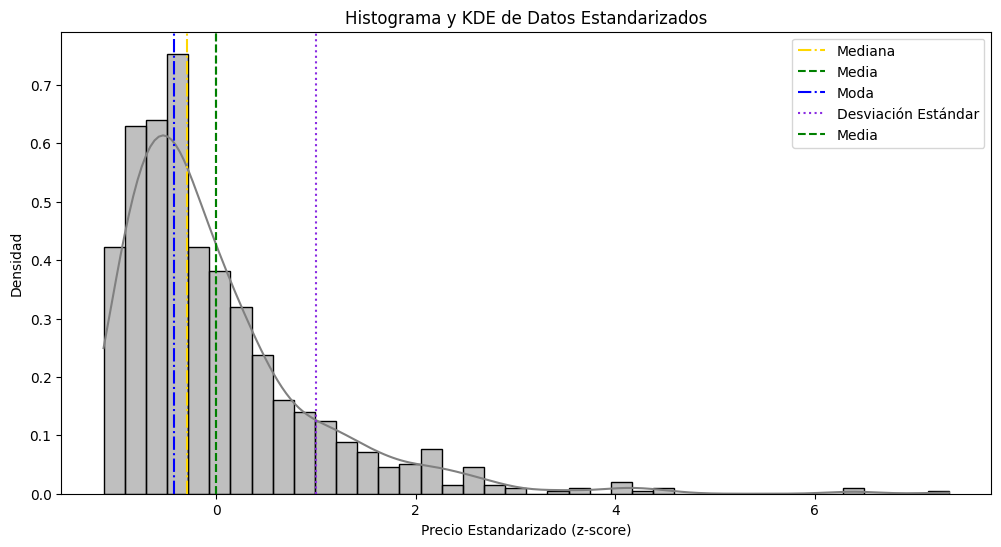

In [235]:
plt.figure(figsize=(12, 6))
sns.histplot(precio_estandarizado, kde=True, color='grey', bins=40, stat="density", edgecolor='black')
plt.axvline(np.median(precio_estandarizado), color='gold', linestyle='-.', label='Mediana')
plt.axvline(np.mean(precio_estandarizado), color='green', linestyle='--', label='Media')
plt.axvline(stats.mode(precio_estandarizado)[0], color='blue', linestyle='-.', label='Moda')
plt.axvline(np.std(precio_estandarizado), color='blueviolet', linestyle=':', label='Desviación Estándar')
plt.title('Histograma y KDE de Datos Estandarizados')
plt.xlabel('Precio Estandarizado (z-score)')
plt.ylabel('Densidad')
plt.axvline(np.mean(precio_estandarizado), color='green', linestyle='--', label='Media')
plt.legend()
plt.show()

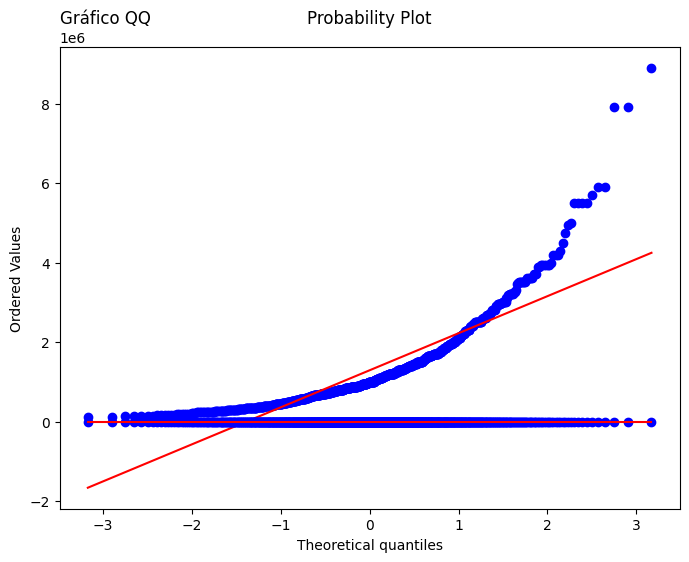

In [238]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(price, dist="norm", plot=plt)
stats.probplot(precio_estandarizado, dist="norm", plot=plt)
plt.title('Gráfico QQ', loc='left')
plt.show()


In [64]:
print(f"Media: {abs(np.round(np.mean(precio_estandarizado)))}")
print(f"Mediana: {abs(np.round(np.median(precio_estandarizado)))}")
print(f"Moda: {abs (np.round(stats.mode(precio_estandarizado), -3))}")

print(f"std: {np.round (np.std(precio_estandarizado))}")

Media: 0.0
Mediana: 0.0
Moda: [0. 0.]
std: 1.0


## Asimetría y curtosis 

#### Coeficiente de Asimetría

In [242]:
# *Coeficiente de asimetria, al ser positivo, la cola de la distribución se encuentra en el lado derecho 
# y los datos se concentran en el lado izquierdo. 
print(f"Coeficiente de asimetría precio: {stats.skew(price)}")
print(f"Coeficiente de asimetría tamaño: {stats.skew(size)}")

Coeficiente de asimetría precio: 2.299673447902698
Coeficiente de asimetría tamaño: 3.358506945156488


#### Coeficiente de Curtosis

  Interpretación:

1. Leptocúrtica ($k_3 > 0$): Decaimiento rápido, cola ligera.
2. Mesocúrtica ($k_3=0$): Curva normal.
3. Paticúrtica ($k_3<0$ ): Decaimiento lento.

In [247]:
# 1. Leptocúrtica (k3 > 0): Decaimiento rápido, cola ligera.

print(f"Curtosis precio: {stats.kurtosis(price)}")
print(f"Curtosis tamaño: {stats.kurtosis(size)}")

Curtosis precio: 8.547211919938682
Curtosis tamaño: 17.229111152834456


##### Representacion  Asimetría y Curtosis

In [ ]:
* Transformar distribuciones e interpretar resultados

## Contraste de hipótesis 1


* H₀ Que las casas del barrio de San Diego son más caras de las del barrio de Salamanca 

In [134]:
import numpy as np
from scipy import stats

In [75]:
price = np.genfromtxt("idealista_madrid.csv", usecols=(0), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
adress= np.genfromtxt('idealista_madrid.csv', delimiter=',',dtype=str,usecols=4,encoding='utf-8',skip_header=1)
                     
print(f"Price: {price [:5]}")
print(f"Adress:{adress[:5]}")

Price: [1920000 1995000 1300000 1650000 1590750]
Adress:['Recoletos' 'Castellana' 'Hortaleza' 'Chamartín' 'Recoletos']


In [ ]:
#### Hipotesis 1
# H0: Las casas en "San Diego son más caras que en el Barrio de Salamanca"

In [101]:


# Filtrar precios para los barrios específicos
precios_san_diego = price[adress == 'San Diego']
precios_salamanca = price[adress == 'Barrio de Salamanca']

# Verificar que hay suficientes datos en ambos grupos
if len(precios_san_diego) > 1 and len(precios_salamanca) > 1:
    # Realizar prueba t de Student
    stat1, pvalue1 = stats.ttest_ind(precios_san_diego, precios_salamanca, alternative='less', equal_var=False, nan_policy='omit')
    
    # Mostrar resultados
    print("\n📊🏡 Contraste de hipótesis: Precios en San Diego vs Barrio de Salamanca")
    print("Estadístico t:", stat1)
    print("P-valor:", pvalue1)
    
    if pvalue1 < 0.05:
        print ("❌ Rechazamos H₀: Las casas en el barrio de San Diego son más caras que en el Barrio de Salamanca.")
    else:
        print("✅ No rechazamos H₀: Las casas en San Diego son más caras que en Barrio de Salamanca.")
else:
    print("❌ No hay suficientes datos en uno o ambos barrios para realizar el contraste de hipótesis.")



📊🏡 Contraste de hipótesis: Precios en San Diego vs Barrio de Salamanca
Estadístico t: -9.7361796413934
P-valor: 1.929687419297274e-14
❌ Rechazamos H₀: Las casas en el barrio de San Diego, son más caras que en el Barrio de Salamanca.


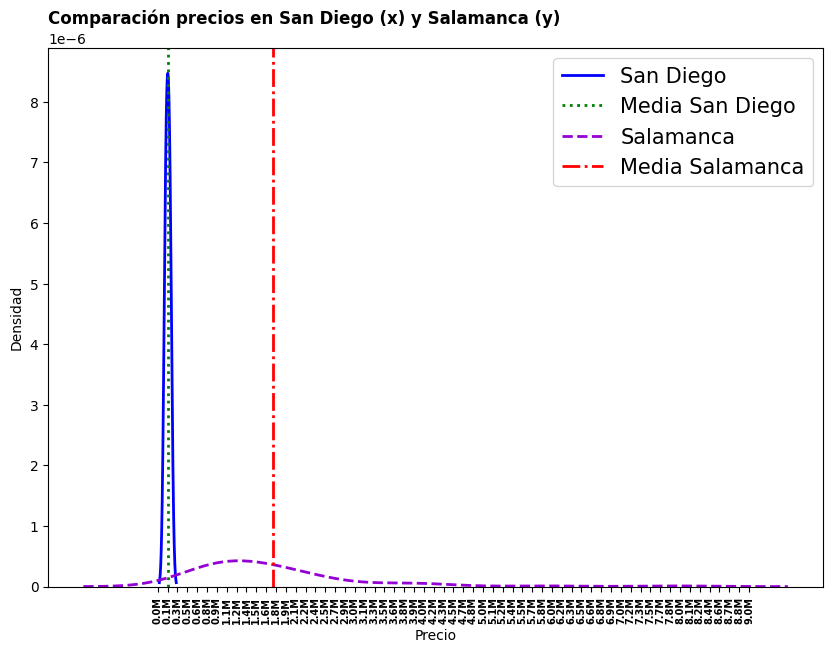

In [129]:
plt.figure(figsize=(10, 7))
sns.kdeplot(precios_san_diego, color='blue', linewidth=2, linestyle='-', label='San Diego')
plt.axvline(np.mean(precios_san_diego), color='green', linestyle=':', label='Media San Diego', linewidth=2)
sns.kdeplot(precios_salamanca, color='darkviolet', linewidth=2, linestyle='--', label='Salamanca')
plt.axvline(np.mean(precios_salamanca), color='red', linestyle='-.', label='Media Salamanca', linewidth=2)  
plt.xticks(rotation=90)
xticks = np.arange(0, np.max(price) + 150000, 150000)
plt.xticks(xticks, [f'{x / 1_000_000:.1f}M' for x in xticks],fontsize=7, fontweight='bold')
plt.legend(fontsize=15, loc="upper right")
plt.title("Comparación precios en San Diego (x) y Salamanca (y)", fontsize=12, fontweight="bold", color="black", loc="left")    
plt.xlabel("Precio")
plt.ylabel("Densidad")
plt.show()



    


## Contraste de hipótesis 2

* H₀ Que las casas de >= 3 baños son más caras que las casas de 1-2 baños

In [136]:
bathrooms = np.genfromtxt("idealista_madrid.csv", usecols=(2), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64) 
print(bathrooms[:5])


[3 3 4 3 3]


In [140]:
precios_3_banos = price[bathrooms >= 3]
precios_1_2_banos = price[(bathrooms== 1) | (bathrooms == 2)]

stat2, pvalue2 = stats.ttest_ind(precios_3_banos, precios_1_2_banos, alternative='greater')

print("\nContraste de hipótesis 2: Casas con >= 3 baños son mas caras que casas con 1-2 baños")
print("📊Estadístico:", stat2, " 📌P-valor:", pvalue2)
if pvalue2 < 0.05:
    print("❌Rechazamos H0: Las casas con >= 3 baños son más caras que las de 1-2 baños")
else:
    print("🆗No podemos rechazar H0: No hay evidencia de que las casas con >= 3 baños sean más caras que las de 1-2 baños")



Contraste de hipótesis 2: Casas con >= 3 baños son mas caras que casas con 1-2 baños
📊Estadístico: 12.892690634169975  📌P-valor: 2.441212560625867e-35
❌Rechazamos H0: Las casas con >= 3 baños son más caras que las de 1-2 baños


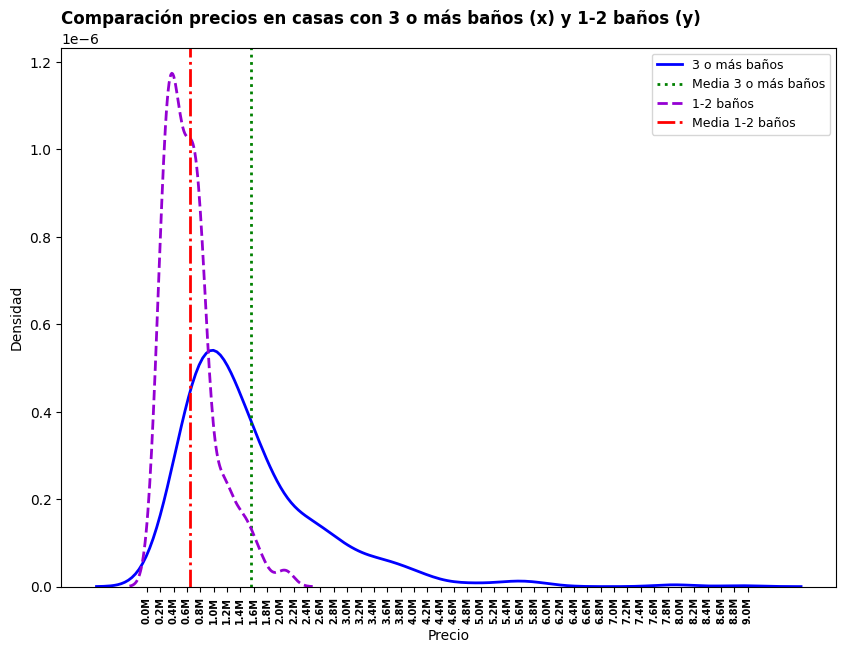

In [150]:
plt.figure(figsize=(10, 7))
sns.kdeplot(precios_3_banos, color='blue', linewidth=2, linestyle='-', label='3 o más baños')
plt.axvline(np.mean(precios_3_banos), color='green', linestyle=':', label='Media 3 o más baños', linewidth=2)   
sns.kdeplot(precios_1_2_banos, color='darkviolet', linewidth=2, linestyle='--', label='1-2 baños')
plt.axvline(np.mean(precios_1_2_banos), color='red', linestyle='-.', label='Media 1-2 baños', linewidth=2)
xticks = np.arange(0, np.max(price) + 200000, 200000)
plt.xticks(xticks, [f'{x / 1_000_000:.1f}M' for x in xticks],fontsize=7, fontweight='bold')
plt.xticks(rotation=90)
plt.legend(fontsize=9, loc="upper right")
plt.title("Comparación precios en casas con 3 o más baños (x) y 1-2 baños (y)", fontsize=12, fontweight="bold", color="black", loc="left")  
plt.xlabel("Precio")    
plt.ylabel("Densidad")
plt.show()

## EJERCICIO ENUNCIADO

Usaremos el dataset de madrid idealista:

https://www.kaggle.com/datasets/kanchana1990/madrid-idealista-property-listings


4 columnas numéricas

* price
* bedrooms
* bathrooms
* m2
* address (quitarle lo de ", Madrid" con numpy)

En cada apartado hacer visualizaciones con matplotlib o seaborn.

* 25 %:

* Carga de datos: cargarlo con np.genfromtext
* Media, mediana
* Máximo y mínimo
* histograma y curva de densidad

***************************************************************************************

* 25 %

* Cuartiles: Q1 (25), Q2 (50), Q3 (75)
* IQR
* Filtrar 20 % más caro, y el 20 % más barato
* Opcional: filtrar los barrios 20 % más baratos
* Moda: calcular moda también de address
* ++Opcional: Moda de los barrios más baratos y más caros
* Dispersión: varianza y desviación estándar

****************************************************************************************

25 % 

* Filtro de outliers: tukey, z-score, marcar en un gráfico los límites de outliers: rojo y azul.
* Correlación: calcular la matriz y pintarla con matplotlib/seaborn
* Estandarización 
_____________________________________________________________________________________
25 % 

* Asimetría y curtosis ###
* Transformar distribuciones e interpretar resultados ###
* Contraste de hipótesis:
    * Que las casas de X barrio son más baratas de las de Y barrio
    * Que las casas de >= 3 baños son más caras que las casas de 1-2 baños


Entrega: 27/12
